In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/itus-capital-dataset/Assignment_data.xlsx


In [ ]:
# Load the dataset
file_path = "/kaggle/input/itus-capital-dataset/Assignment_data.xlsx"  # Update this with the actual file path in your Kaggle notebook
df = pd.read_excel(file_path)

# Display the first few rows
df.head()


,Company Name,202006,202009,202012,202103,202106,202109,202112,202203,202206,202209,202212,202303,202306,202309,202312,202403
0,360 One Wam Ltd.,349.463,387.433,454.730,420.002,381.450,485.670,536.230,447.300,471.120,504.800,517.090,482.190,558.960,554.600,647.680,791.740
1,3M India Ltd.,346.179,690.005,741.441,827.207,743.872,840.096,826.281,925.593,943.596,976.698,993.034,1046.039,1049.656,1039.516,1005.644,1094.546
2,Aarti Industries Ltd.,937.330,1172.640,1186.780,1209.350,1316.760,1255.860,2076.170,1437.000,1610.000,1685.000,1668.000,1656.000,1414.000,1454.000,1732.000,1773.000
3,Aavas Financiers Ltd.,233.509,270.427,309.978,289.446,271.933,324.850,342.580,365.086,352.861,394.851,411.366,449.687,466.973,496.837,508.066,546.020
4,ABB India Ltd.,985.780,1612.170,1700.760,1629.150,1424.960,1778.390,2101.500,1974.860,2097.850,2119.740,2426.910,2411.210,2508.630,2769.190,2757.490,3080.360


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  500 non-null    object 
 1   202006        453 non-null    float64
 2   202009        459 non-null    float64
 3   202012        470 non-null    float64
 4   202103        476 non-null    float64
 5   202106        477 non-null    float64
 6   202109        482 non-null    float64
 7   202112        485 non-null    float64
 8   202203        486 non-null    float64
 9   202206        491 non-null    float64
 10  202209        496 non-null    float64
 11  202212        498 non-null    float64
 12  202303        499 non-null    float64
 13  202306        491 non-null    float64
 14  202309        497 non-null    float64
 15  202312        500 non-null    float64
 16  202403        489 non-null    float64
dtypes: float64(16), object(1)
memory usage: 66.5+ KB


In [ ]:
import pandas as pd

# Load dataset (assuming df is already loaded)
df_yoy = df[['Company Name']].copy()  # Start with just company names

# Convert column names to strings for consistency
df.columns = df.columns.astype(str)

# Iterate over columns (skip 'Company Name')
for col in df.columns[1:]:
    prev_year_col = str(int(col) - 100)  # Find previous year's column
    if prev_year_col in df.columns:
        df_yoy[col + "_YoY"] = ((df[col] - df[prev_year_col]) / df[prev_year_col]) * 100  # Calculate YoY growth

# Show first few rows of the new YoY growth DataFrame
df_yoy.head()


,Company Name,202106_YoY,202109_YoY,202112_YoY,202203_YoY,202206_YoY,202209_YoY,202212_YoY,202303_YoY,202306_YoY,202309_YoY,202312_YoY,202403_YoY
0,360 One Wam Ltd.,9.153186,25.355868,17.922723,6.499493,23.507668,3.938889,-3.569364,7.800134,18.644931,9.865293,25.254791,64.196686
1,3M India Ltd.,114.880741,21.752161,11.442583,11.893758,26.849243,16.260285,20.181149,13.012847,11.239980,6.431671,1.269846,4.637208
2,Aarti Industries Ltd.,40.479874,7.096807,74.941438,18.824162,22.269814,34.171006,-19.659758,15.240084,-12.173913,-13.709199,3.836930,7.065217
3,Aavas Financiers Ltd.,16.455040,20.124840,10.517521,26.132681,29.760272,21.548715,20.078814,23.172896,32.339080,25.828984,23.507047,21.422234
4,ABB India Ltd.,44.551523,10.310327,23.562407,21.220268,47.221676,19.194327,15.484654,22.095237,19.581000,30.638191,13.621436,27.751627


In [ ]:
# Replace 'inf' with NaN for meaningful analysis
df_yoy.replace([float('inf'), float('-inf')], float('nan'), inplace=True)


In [ ]:
# Ensure '202403_YoY' exists before sorting
if '202403_YoY' in df_yoy.columns:
    top_10_yoy = df_yoy[['Company Name', '202403_YoY']].sort_values(by='202403_YoY', ascending=False).head(10)
    print(top_10_yoy)
else:
    print("Column '202403_YoY' not found. Check if the YoY calculations were done correctly.")


                                  Company Name   202403_YoY
252                JIO Financial Services Ltd.  2255.492958
54            Bajaj Holdings & Investment Ltd.  1297.900565
415  Sterling and Wilson Renewable Energy Ltd.  1232.138415
444                        Tejas Networks Ltd.   343.298142
238                             Inox Wind Ltd.   176.660550
84                                    BSE Ltd.   115.131492
114                       Cochin Shipyard Ltd.   114.310068
317      Motilal Oswal Financial Services Ltd.   108.424424
82                    Brigade Enterprises Ltd.   102.044934
169                          Gland Pharma Ltd.    95.850759


In [ ]:
# Ensure NaN values don't interfere with decline count
df_yoy_clean = df_yoy.copy()
df_yoy_clean = df_yoy_clean.replace([float('inf'), float('-inf')], float('nan')).dropna()

# Recalculate decline streaks
decline_companies = df_yoy_clean[['Company Name']].copy()
decline_companies['Decline_Streak'] = (df_yoy_clean.filter(like='_YoY') < 0).astype(int).sum(axis=1)

# Filter companies with at least 4 quarters of revenue decline
consistent_decliners = decline_companies[decline_companies['Decline_Streak'] >= 4]

print(consistent_decliners)


                           Company Name  Decline_Streak
12                     Adani Power Ltd.               4
17                 Aegis Logistics Ltd.               6
22         Alembic Pharmaceuticals Ltd.               5
24          Alkyl Amines Chemicals Ltd.               5
25              Allcargo Logistics Ltd.               5
..                                  ...             ...
477   UTI Asset Management Company Ltd.               5
479              Vardhman Textiles Ltd.               6
490                 Welspun Living Ltd.               4
492             Whirlpool Of India Ltd.               5
495  Zee Entertainment Enterprises Ltd.               5

[101 rows x 2 columns]


In [ ]:
# Create a new dataframe to store CAGR values
df_cagr = df[['Company Name']].copy()

# Define start and end period
start_period = '202006'  # First available quarter
end_period = '202403'    # Most recent quarter

# Ensure both columns exist in the dataframe
if start_period in df.columns and end_period in df.columns:
    # Calculate number of years between the start and end period
    num_years = (int(end_period[:4]) - int(start_period[:4])) + (int(end_period[4:]) - int(start_period[4:])) / 4  # Convert quarters into fractional years

    # Compute CAGR for each company
    df_cagr['CAGR'] = ((df[end_period] / df[start_period]) ** (1 / num_years)) - 1

    # Convert to percentage
    df_cagr['CAGR'] = df_cagr['CAGR'] * 100

    # Display top companies by CAGR
    print(df_cagr.sort_values(by='CAGR', ascending=False).head(10))
else:
    print(f"Columns {start_period} or {end_period} not found in dataset.")


                       Company Name        CAGR
261          Jubilant Ingrevia Ltd.         inf
378    RattanIndia Enterprises Ltd.         inf
292     Lloyds Metals & Energy Ltd.  363.879445
368                   PVR Inox Ltd.  311.098517
143         Easy Trip Planners Ltd.  225.029518
263             Jupiter Wagons Ltd.  204.394288
146                        EIH Ltd.  168.996486
240        Interglobe Aviation Ltd.  163.285779
180          Godrej Properties Ltd.  150.312582
389  Safari Industries (India) Ltd.  144.032947


In [ ]:
# Replace 'inf' and '-inf' with NaN
df_cagr['CAGR'].replace([float('inf'), float('-inf')], float('nan'), inplace=True)

# Drop NaN values (optional, depending on how we want to handle them)
df_cagr_cleaned = df_cagr.dropna()

# Show top CAGR companies after cleaning
print(df_cagr_cleaned.sort_values(by='CAGR', ascending=False).head(10))


                       Company Name        CAGR
292     Lloyds Metals & Energy Ltd.  363.879445
368                   PVR Inox Ltd.  311.098517
143         Easy Trip Planners Ltd.  225.029518
263             Jupiter Wagons Ltd.  204.394288
146                        EIH Ltd.  168.996486
240        Interglobe Aviation Ltd.  163.285779
180          Godrej Properties Ltd.  150.312582
389  Safari Industries (India) Ltd.  144.032947
444             Tejas Networks Ltd.  137.203729
379                    Raymond Ltd.  134.635093


<ipython-input-10-1f621ce5131f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cagr['CAGR'].replace([float('inf'), float('-inf')], float('nan'), inplace=True)


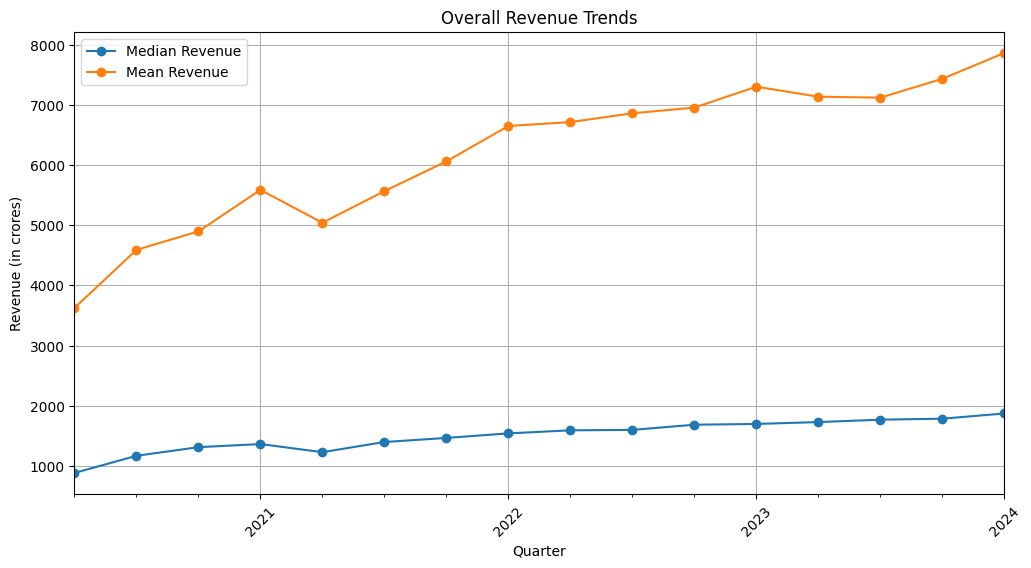

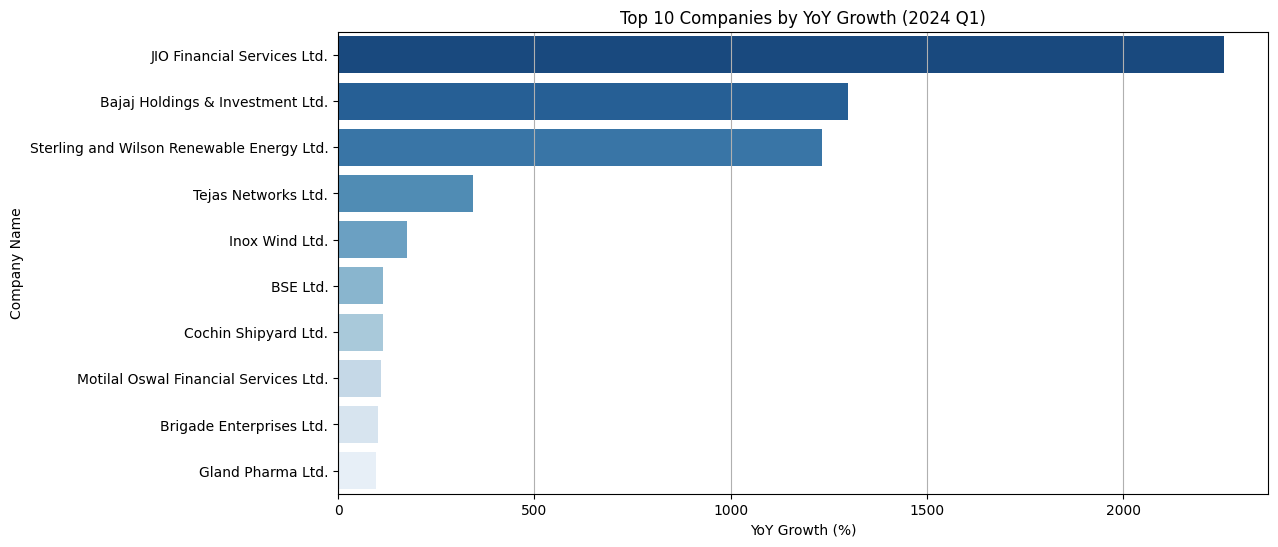

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


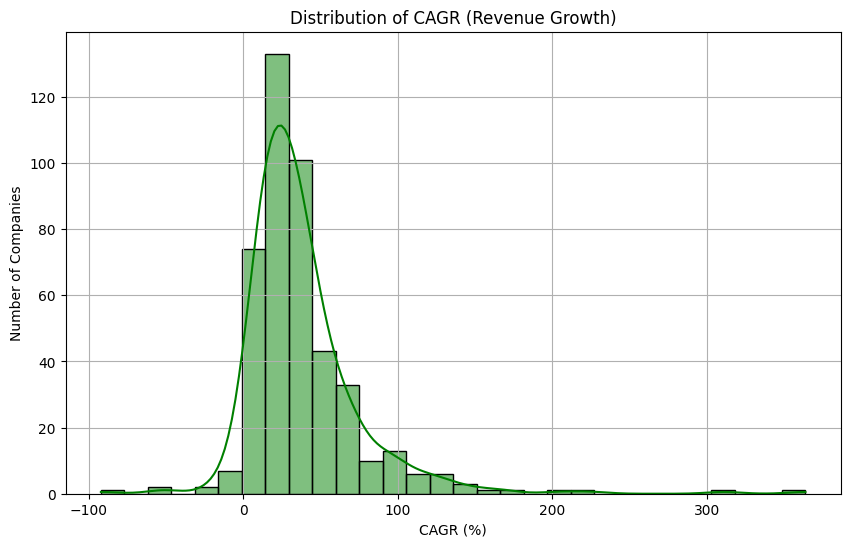

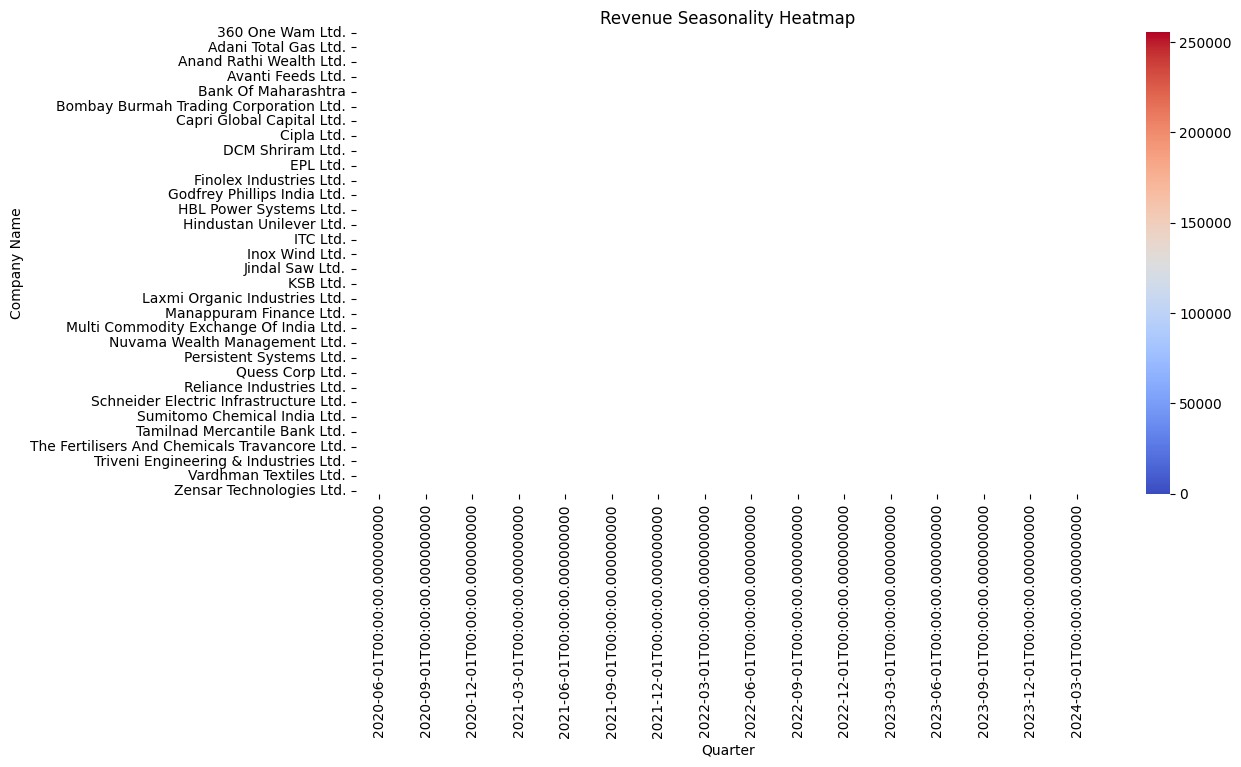

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert columns to datetime for better plots
df_melted = df.melt(id_vars=['Company Name'], var_name='Quarter', value_name='Revenue')
df_melted['Quarter'] = pd.to_datetime(df_melted['Quarter'], format='%Y%m')

## 1. Overall Revenue Trends ##
plt.figure(figsize=(12, 6))
df_melted.groupby('Quarter')['Revenue'].median().plot(label="Median Revenue", marker='o')
df_melted.groupby('Quarter')['Revenue'].mean().plot(label="Mean Revenue", marker='o')
plt.legend()
plt.title("Overall Revenue Trends")
plt.ylabel("Revenue (in crores)")
plt.xlabel("Quarter")
plt.xticks(rotation=45)
plt.grid()
plt.show()

## 2. Top 10 YoY Growth Companies ##
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_yoy, x='202403_YoY', y='Company Name', palette='Blues_r')
plt.xlabel("YoY Growth (%)")
plt.ylabel("Company Name")
plt.title("Top 10 Companies by YoY Growth (2024 Q1)")
plt.grid(axis='x')
plt.show()


# 3. Plot Distribution of CAGR
# Ensure 'inf' values are treated as NaN and removed
df_cagr_cleaned = df_cagr.copy()
df_cagr_cleaned = df_cagr_cleaned.assign(CAGR=df_cagr_cleaned['CAGR'].replace([np.inf, -np.inf], np.nan))
df_cagr_cleaned = df_cagr_cleaned.dropna(subset=['CAGR'])


plt.figure(figsize=(10, 6))
sns.histplot(df_cagr_cleaned['CAGR'], bins=30, kde=True, color='green')
plt.title("Distribution of CAGR (Revenue Growth)")
plt.xlabel("CAGR (%)")
plt.ylabel("Number of Companies")
plt.grid()
plt.show()


## 4. Seasonality Heatmap ##
# Fill NaN with the median revenue of the company (row-wise)

# Fill NaN with the median revenue of each company (row-wise)
pivot_table = df_melted.pivot_table(index='Company Name', columns='Quarter', values='Revenue', aggfunc='median')
pivot_table = pivot_table.apply(lambda row: row.fillna(row.median()), axis=1)

# Generate Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', linewidths=0.5)
plt.title("Revenue Seasonality Heatmap")
plt.xlabel("Quarter")
plt.ylabel("Company Name")
plt.show()




# ** *We calculate and add more features before clustering***

because I did k-means clustering before in another notebook using just yoy growth rate and cagr and we were getting only 2 major clusters and other clusters with outliers


In [ ]:


# Create a copy of the dataframe for QoQ growth calculations
df_qoq = df.copy()

# Iterate over columns to calculate QoQ growth
for i in range(2, len(df.columns)):  # Start from the third column (first revenue column)
    prev_col = df.columns[i - 1]
    curr_col = df.columns[i]
    df_qoq[curr_col + "_QoQ"] = ((df[curr_col] - df[prev_col]) / df[prev_col]) * 100

# Replace inf values with NaN
df_qoq.replace([np.inf, -np.inf], np.nan, inplace=True)

# Show the first few rows
df_qoq.head()


,Company Name,202006,202009,202012,202103,202106,202109,202112,202203,202206,...,202112_QoQ,202203_QoQ,202206_QoQ,202209_QoQ,202212_QoQ,202303_QoQ,202306_QoQ,202309_QoQ,202312_QoQ,202403_QoQ
0,360 One Wam Ltd.,349.463,387.433,454.730,420.002,381.450,485.670,536.230,447.300,471.120,...,10.410361,-16.584302,5.325285,7.148922,2.434628,-6.749309,15.921110,-0.780020,16.783267,22.242465
1,3M India Ltd.,346.179,690.005,741.441,827.207,743.872,840.096,826.281,925.593,943.596,...,-1.644455,12.019156,1.945023,3.508069,1.672574,5.337682,0.345781,-0.966031,-3.258440,8.840305
2,Aarti Industries Ltd.,937.330,1172.640,1186.780,1209.350,1316.760,1255.860,2076.170,1437.000,1610.000,...,65.318586,-30.786015,12.038970,4.658385,-1.008902,-0.719424,-14.613527,2.828854,19.119670,2.367206
3,Aavas Financiers Ltd.,233.509,270.427,309.978,289.446,271.933,324.850,342.580,365.086,352.861,...,5.457904,6.569560,-3.348526,11.899870,4.182590,9.315549,3.844007,6.395231,2.260097,7.470289
4,ABB India Ltd.,985.780,1612.170,1700.760,1629.150,1424.960,1778.390,2101.500,1974.860,2097.850,...,18.168681,-6.026172,6.227783,1.043449,14.490928,-0.646913,4.040295,10.386546,-0.422506,11.708837


In [ ]:
# Calculate standard deviation across all revenue columns (excluding 'Company Name')
df_qoq['Revenue_StdDev'] = df.iloc[:, 1:].std(axis=1, skipna=True)

# Show the first few rows
df_qoq[['Company Name', 'Revenue_StdDev']].head()


,Company Name,Revenue_StdDev
0,360 One Wam Ltd.,108.618858
1,3M India Ltd.,189.370228
2,Aarti Industries Ltd.,289.988123
3,Aavas Financiers Ltd.,94.783259
4,ABB India Ltd.,556.452190


In [ ]:
df_qoq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company Name    500 non-null    object 
 1   202006          453 non-null    float64
 2   202009          459 non-null    float64
 3   202012          470 non-null    float64
 4   202103          476 non-null    float64
 5   202106          477 non-null    float64
 6   202109          482 non-null    float64
 7   202112          485 non-null    float64
 8   202203          486 non-null    float64
 9   202206          491 non-null    float64
 10  202209          496 non-null    float64
 11  202212          498 non-null    float64
 12  202303          499 non-null    float64
 13  202306          491 non-null    float64
 14  202309          497 non-null    float64
 15  202312          500 non-null    float64
 16  202403          489 non-null    float64
 17  202009_QoQ      451 non-null    flo

In [ ]:
# Merge YoY growth
df_features = df_qoq.merge(df_yoy_clean, on='Company Name', how='left')

# Merge CAGR
df_features = df_features.merge(df_cagr_cleaned, on='Company Name', how='left')

# Display the updated DataFrame
df_features.head()


,Company Name,202006,202009,202012,202103,202106,202109,202112,202203,202206,...,202203_YoY,202206_YoY,202209_YoY,202212_YoY,202303_YoY,202306_YoY,202309_YoY,202312_YoY,202403_YoY,CAGR
0,360 One Wam Ltd.,349.463,387.433,454.730,420.002,381.450,485.670,536.230,447.300,471.120,...,6.499493,23.507668,3.938889,-3.569364,7.800134,18.644931,9.865293,25.254791,64.196686,28.613507
1,3M India Ltd.,346.179,690.005,741.441,827.207,743.872,840.096,826.281,925.593,943.596,...,11.893758,26.849243,16.260285,20.181149,13.012847,11.239980,6.431671,1.269846,4.637208,42.503533
2,Aarti Industries Ltd.,937.330,1172.640,1186.780,1209.350,1316.760,1255.860,2076.170,1437.000,1610.000,...,18.824162,22.269814,34.171006,-19.659758,15.240084,-12.173913,-13.709199,3.836930,7.065217,21.667398
3,Aavas Financiers Ltd.,233.509,270.427,309.978,289.446,271.933,324.850,342.580,365.086,352.861,...,26.132681,29.760272,21.548715,20.078814,23.172896,32.339080,25.828984,23.507047,21.422234,29.870110
4,ABB India Ltd.,985.780,1612.170,1700.760,1629.150,1424.960,1778.390,2101.500,1974.860,2097.850,...,21.220268,47.221676,19.194327,15.484654,22.095237,19.581000,30.638191,13.621436,27.751627,41.988366


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Create a function to compute the revenue slope
def calculate_revenue_slope(revenue_data):
    # Drop NaN values
    revenue_data = revenue_data.dropna()

    if len(revenue_data) < 2:  # If we have less than 2 data points, return NaN
        return np.nan

    # X values: Quarter indices (0,1,2,...)
    X = np.arange(len(revenue_data)).reshape(-1, 1)

    # Y values: Revenue values
    y = revenue_data.values.reshape(-1, 1)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    return model.coef_[0][0]  # Return the slope coefficient

# Apply function to each company
df_features['Revenue_Slope'] = df.iloc[:, 1:].apply(calculate_revenue_slope, axis=1)


In [ ]:
# Rolling average of the last 4 quarters (mean of last 4 revenue columns)
df_features['Rolling_Avg_Growth'] = df.iloc[:, -4:].mean(axis=1, skipna=True)


In [ ]:
# Function to calculate max drawdown
def calculate_max_drawdown(revenue_series):
    peak = revenue_series.expanding().max()  # Rolling max
    drawdown = (revenue_series / peak) - 1   # Drop percentage
    return drawdown.min()  # Largest drop

# Apply max drawdown calculation
df_features['Max_Drawdown'] = df.iloc[:, 1:].apply(calculate_max_drawdown, axis=1)


In [ ]:
df_features.head()


,Company Name,202006,202009,202012,202103,202106,202109,202112,202203,202206,...,202212_YoY,202303_YoY,202306_YoY,202309_YoY,202312_YoY,202403_YoY,CAGR,Revenue_Slope,Rolling_Avg_Growth,Max_Drawdown
0,360 One Wam Ltd.,349.463,387.433,454.730,420.002,381.450,485.670,536.230,447.300,471.120,...,-3.569364,7.800134,18.644931,9.865293,25.254791,64.196686,28.613507,19.350541,638.2450,-0.165843
1,3M India Ltd.,346.179,690.005,741.441,827.207,743.872,840.096,826.281,925.593,943.596,...,20.181149,13.012847,11.239980,6.431671,1.269846,4.637208,42.503533,35.233516,1047.3405,-0.100743
2,Aarti Industries Ltd.,937.330,1172.640,1186.780,1209.350,1316.760,1255.860,2076.170,1437.000,1610.000,...,-19.659758,15.240084,-12.173913,-13.709199,3.836930,7.065217,21.667398,41.210103,1593.2500,-0.318938
3,Aavas Financiers Ltd.,233.509,270.427,309.978,289.446,271.933,324.850,342.580,365.086,352.861,...,20.078814,23.172896,32.339080,25.828984,23.507047,21.422234,29.870110,19.487662,504.4740,-0.122735
4,ABB India Ltd.,985.780,1612.170,1700.760,1629.150,1424.960,1778.390,2101.500,1974.860,2097.850,...,15.484654,22.095237,19.581000,30.638191,13.621436,27.751627,41.988366,112.205838,2778.9175,-0.162163


In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company Name        500 non-null    object 
 1   202006              453 non-null    float64
 2   202009              459 non-null    float64
 3   202012              470 non-null    float64
 4   202103              476 non-null    float64
 5   202106              477 non-null    float64
 6   202109              482 non-null    float64
 7   202112              485 non-null    float64
 8   202203              486 non-null    float64
 9   202206              491 non-null    float64
 10  202209              496 non-null    float64
 11  202212              498 non-null    float64
 12  202303              499 non-null    float64
 13  202306              491 non-null    float64
 14  202309              497 non-null    float64
 15  202312              500 non-null    float64
 16  202403  

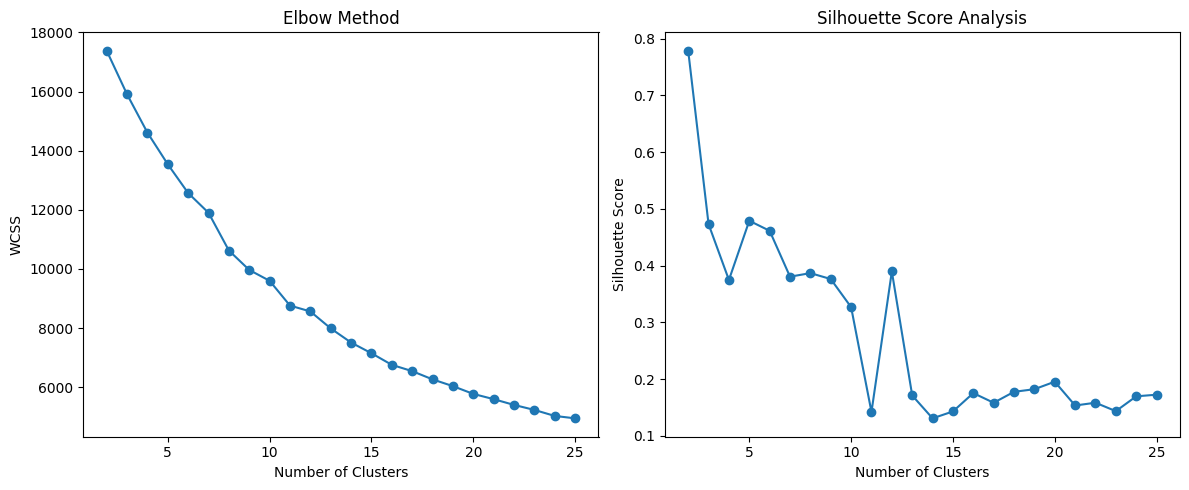

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming df_features is already defined and contains all required features
df_features = df_features.copy()

# Dropping non-numeric columns
df_numeric = df_features.drop(columns=["Company Name"])

# Handling missing values (impute with median)
df_numeric.fillna(df_numeric.median(), inplace=True)

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Finding optimal K using Elbow Method
wcss = []
silhouette_scores = []

K_range = range(2, 26)  # From 2 to 25 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Within-cluster sum of squares

    # Compute silhouette score only if k > 1
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')

plt.tight_layout()
plt.show()


In [ ]:
print(silhouette_scores[9:14])

[0.1421152050917741, 0.38960273591648525, 0.17121559845163545, 0.1309067826131814, 0.14306972805243912]


# ***we do 12-means clustering***


In [ ]:
kmeans_12 = KMeans(n_clusters=12, random_state=42, n_init=10)
kmeans_12.fit(df_scaled)
print(np.bincount(kmeans_12.labels_))


[401   3   6  40   8   1   1   1  33   1   1   4]


In [ ]:
# Identify companies in the largest cluster
df_large_cluster = df_scaled[kmeans_12.labels_ == 0]

# Apply K-Means again to sub-cluster the large group
kmeans_sub = KMeans(n_clusters=4, random_state=42, n_init=10)  # Choose a small number of sub-clusters
df_large_cluster_labels = kmeans_sub.fit_predict(df_large_cluster)

# Replace the large cluster (0) with its new sub-clusters
new_labels = kmeans_12.labels_.copy()
large_cluster_indices = np.where(kmeans_12.labels_ == 0)[0]
for i, idx in enumerate(large_cluster_indices):
    new_labels[idx] = df_large_cluster_labels[i] + 12  # Assign new cluster IDs beyond 12


In [ ]:
# Find centroids of the original 12 clusters
centroids = kmeans_12.cluster_centers_

# Assign tiny clusters (size ≤ 3) to the nearest bigger cluster
for cluster_id in [i for i, size in enumerate(np.bincount(new_labels)) if size <= 3 and size > 0]:
    tiny_cluster_points = df_scaled[new_labels == cluster_id]

    if tiny_cluster_points.shape[0] == 0:  # Skip empty clusters
        continue

    # Find the closest centroid among bigger clusters
    distances = np.linalg.norm(centroids - tiny_cluster_points.mean(axis=0), axis=1)
    nearest_cluster = np.argmin(distances)

    # Reassign points
    new_labels[new_labels == cluster_id] = nearest_cluster


In [ ]:
# Count occurrences of each cluster
cluster_distribution = np.bincount(new_labels)

# Display cluster sizes
print(cluster_distribution)

[  3   3   6  40   8   1   1   1  33   1   1   4 217   0  36 145]


In [ ]:
# Identify companies in the largest clusters
large_clusters = [12, 15]  # The clusters with 217 and 145 elements

for cluster_id in large_clusters:
    df_large_cluster = df_scaled[new_labels == cluster_id]

    # Choose number of sub-clusters dynamically (e.g., 3 to 5)
    n_sub_clusters = min(5, len(df_large_cluster) // 30)  # Ensure reasonable sub-cluster sizes
    kmeans_sub = KMeans(n_clusters=n_sub_clusters, random_state=42, n_init=10)
    df_large_cluster_labels = kmeans_sub.fit_predict(df_large_cluster)

    # Assign new cluster IDs beyond the current max cluster index
    max_cluster_id = new_labels.max() + 1
    large_cluster_indices = np.where(new_labels == cluster_id)[0]

    for i, idx in enumerate(large_cluster_indices):
        new_labels[idx] = df_large_cluster_labels[i] + max_cluster_id

# Count occurrences of each new cluster
cluster_distribution = np.bincount(new_labels)
print(cluster_distribution)


[ 3  3  6 40  8  1  1  1 33  1  1  4  0  0 36  0 99 59 44  1 14  1 52 43
 49]


In [ ]:
# Define a threshold for small clusters (e.g., ≤3 members)
small_clusters = [i for i, size in enumerate(cluster_distribution) if size <= 3 and size > 0]

# Find centroids of all clusters
final_centroids = []
for cluster_id in range(len(cluster_distribution)):
    cluster_points = df_scaled[new_labels == cluster_id]
    if len(cluster_points) > 0:
        final_centroids.append(cluster_points.mean(axis=0))
final_centroids = np.array(final_centroids)

# Reassign small clusters if they are not outliers
for cluster_id in small_clusters:
    tiny_cluster_points = df_scaled[new_labels == cluster_id]

    if tiny_cluster_points.shape[0] == 0:  # Skip empty clusters
        continue

    # Find the nearest centroid among **bigger** clusters
    distances = np.linalg.norm(final_centroids - tiny_cluster_points.mean(axis=0), axis=1)
    nearest_cluster = np.argmin(distances)

    # Ensure we don’t merge with another tiny cluster
    if cluster_distribution[nearest_cluster] > 3:
        new_labels[new_labels == cluster_id] = nearest_cluster

# Count occurrences of each final cluster
final_cluster_distribution = np.bincount(new_labels)
print(final_cluster_distribution)


[  3   3   6  40   8   1   1   1  33   1   1   4   0   0  36   0 100  59
  45   0  14   0  52  43  49]


In [ ]:
# Remove empty clusters from the label assignments
valid_clusters = [i for i in range(len(final_cluster_distribution)) if final_cluster_distribution[i] > 0]

# Map old labels to new labels after removing empty clusters
label_mapping = {old: new for new, old in enumerate(valid_clusters)}
new_labels = np.array([label_mapping[label] if label in label_mapping else -1 for label in new_labels])

# Recompute final cluster distribution
final_cluster_distribution = np.bincount(new_labels[new_labels != -1])
print(final_cluster_distribution)


[  3   3   6  40   8   1   1   1  33   1   1   4  36 100  59  45  14  52
  43  49]


In [ ]:
df_features.info()
df_features.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company Name        500 non-null    object 
 1   202006              453 non-null    float64
 2   202009              459 non-null    float64
 3   202012              470 non-null    float64
 4   202103              476 non-null    float64
 5   202106              477 non-null    float64
 6   202109              482 non-null    float64
 7   202112              485 non-null    float64
 8   202203              486 non-null    float64
 9   202206              491 non-null    float64
 10  202209              496 non-null    float64
 11  202212              498 non-null    float64
 12  202303              499 non-null    float64
 13  202306              491 non-null    float64
 14  202309              497 non-null    float64
 15  202312              500 non-null    float64
 16  202403  

,Company Name,202006,202009,202012,202103,202106,202109,202112,202203,202206,...,202212_YoY,202303_YoY,202306_YoY,202309_YoY,202312_YoY,202403_YoY,CAGR,Revenue_Slope,Rolling_Avg_Growth,Max_Drawdown
0,360 One Wam Ltd.,349.463,387.433,454.730,420.002,381.450,485.670,536.230,447.300,471.120,...,-3.569364,7.800134,18.644931,9.865293,25.254791,64.196686,28.613507,19.350541,638.2450,-0.165843
1,3M India Ltd.,346.179,690.005,741.441,827.207,743.872,840.096,826.281,925.593,943.596,...,20.181149,13.012847,11.239980,6.431671,1.269846,4.637208,42.503533,35.233516,1047.3405,-0.100743
2,Aarti Industries Ltd.,937.330,1172.640,1186.780,1209.350,1316.760,1255.860,2076.170,1437.000,1610.000,...,-19.659758,15.240084,-12.173913,-13.709199,3.836930,7.065217,21.667398,41.210103,1593.2500,-0.318938
3,Aavas Financiers Ltd.,233.509,270.427,309.978,289.446,271.933,324.850,342.580,365.086,352.861,...,20.078814,23.172896,32.339080,25.828984,23.507047,21.422234,29.870110,19.487662,504.4740,-0.122735
4,ABB India Ltd.,985.780,1612.170,1700.760,1629.150,1424.960,1778.390,2101.500,1974.860,2097.850,...,15.484654,22.095237,19.581000,30.638191,13.621436,27.751627,41.988366,112.205838,2778.9175,-0.162163


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

# Check cluster distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=df_features['Cluster'], palette='viridis')
plt.xlabel("Cluster")
plt.ylabel("Number of Companies")
plt.title("Cluster Size Distribution")
plt.grid(axis='y')
plt.show()


KeyError: 'Cluster'

<Figure size 1000x500 with 0 Axes>

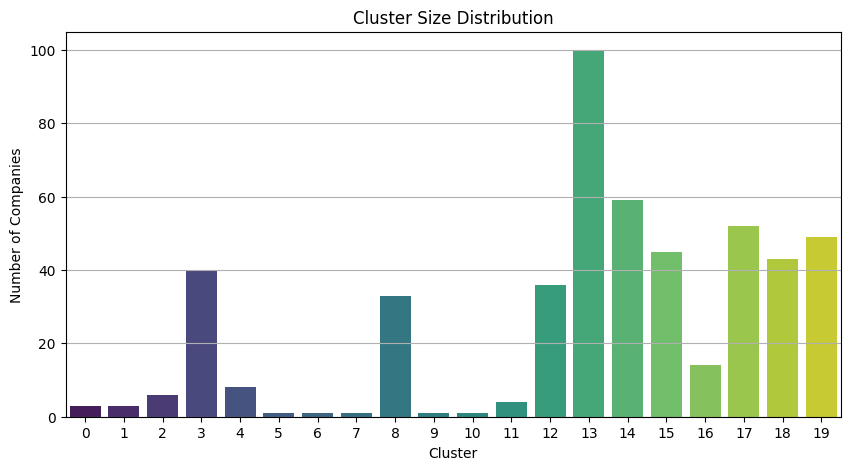

In [ ]:
df_features['Cluster'] = new_labels

plt.figure(figsize=(10, 5))
sns.countplot(x=df_features['Cluster'], palette='viridis')
plt.xlabel("Cluster")
plt.ylabel("Number of Companies")
plt.title("Cluster Size Distribution")
plt.grid(axis='y')
plt.show()


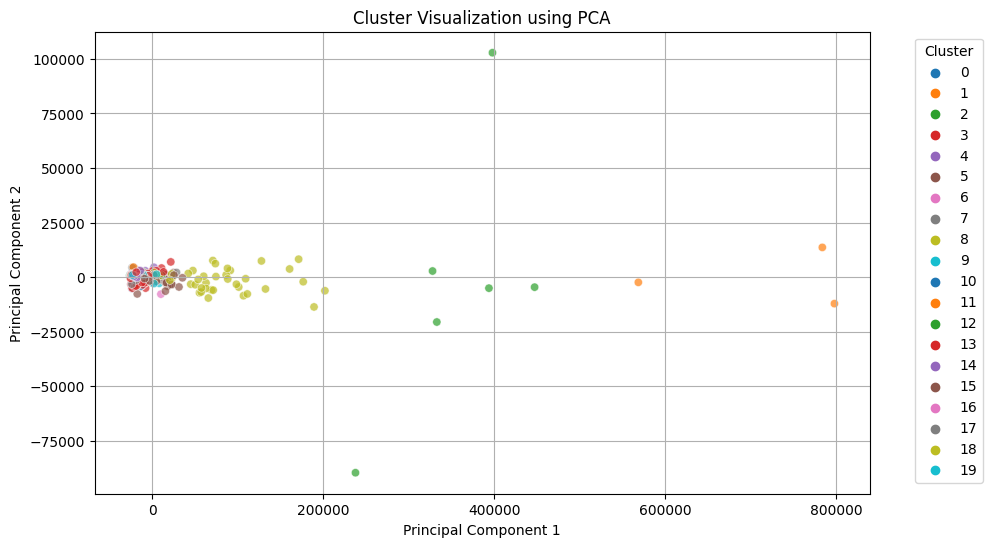

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
df_features_imputed = pd.DataFrame(imputer.fit_transform(df_features.drop(columns=['Company Name', 'Cluster'])))

# Reduce dimensions with PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_features_imputed)

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_features['Cluster']

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='tab10', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster Visualization using PCA")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


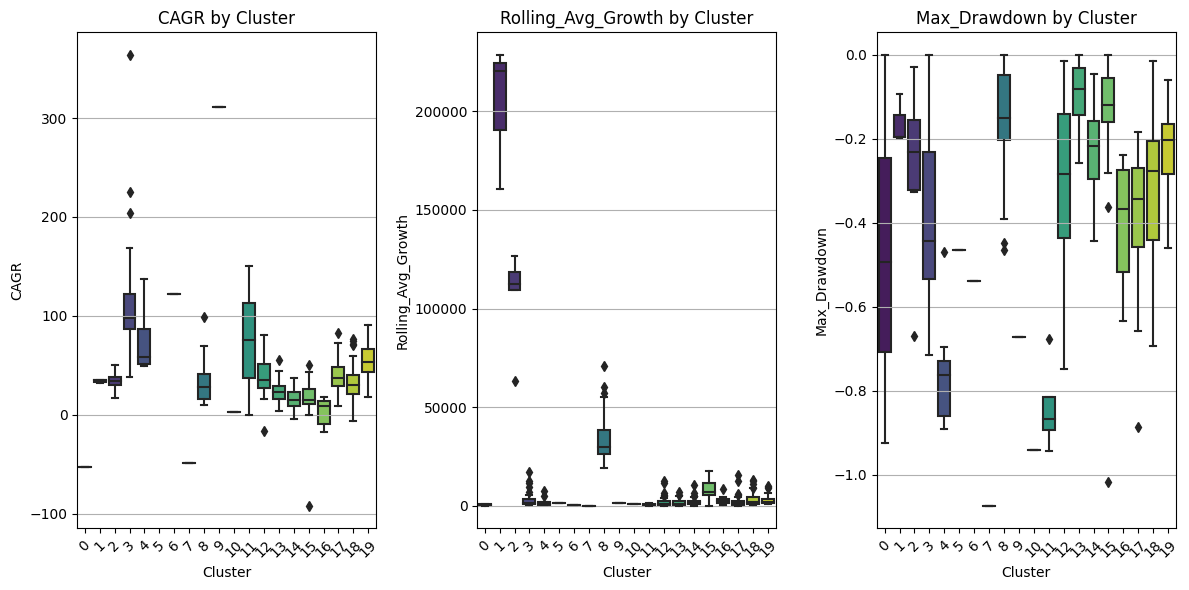

In [ ]:
# Select key features for visualization
key_features = ['CAGR', 'Rolling_Avg_Growth', 'Max_Drawdown']

# Create boxplots for each key feature by cluster
plt.figure(figsize=(12, 6))
for i, feature in enumerate(key_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df_features, x='Cluster', y=feature, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f"{feature} by Cluster")
    plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [ ]:
top_performers = df_features.nlargest(10, 'CAGR')
underperformers = df_features.nsmallest(10, 'CAGR')


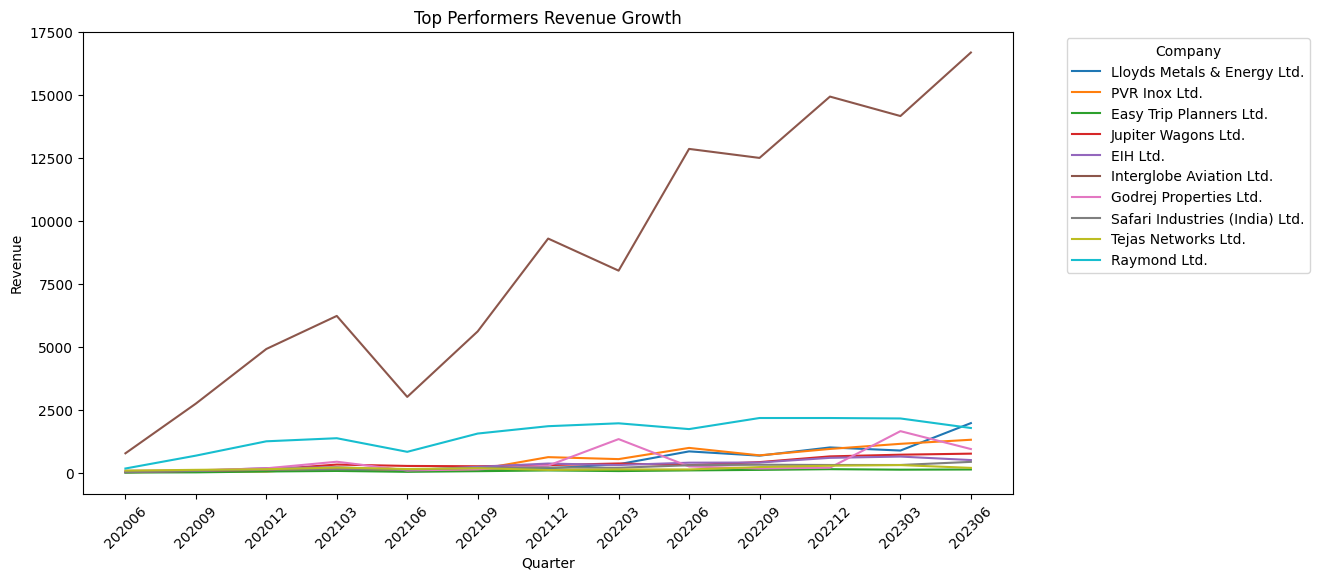

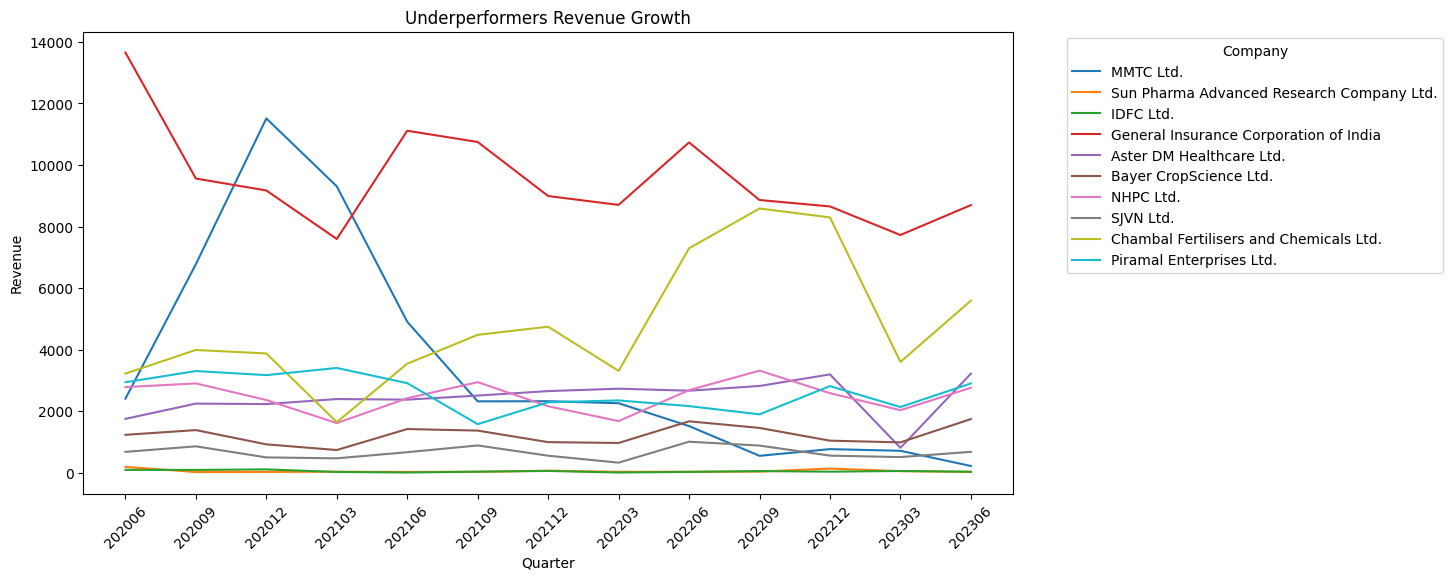

In [ ]:
top_performers_revenue = df_features[df_features['Company Name'].isin(top_performers['Company Name'])]
underperformers_revenue = df_features[df_features['Company Name'].isin(underperformers['Company Name'])]

# Plot for top performers
plt.figure(figsize=(12, 6))
for company in top_performers['Company Name']:
    company_data = top_performers_revenue[top_performers_revenue['Company Name'] == company]
    plt.plot(company_data.columns[1:14], company_data.iloc[:, 1:14].T, label=company)
plt.title('Top Performers Revenue Growth')
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Plot for underperformers
plt.figure(figsize=(12, 6))
for company in underperformers['Company Name']:
    company_data = underperformers_revenue[underperformers_revenue['Company Name'] == company]
    plt.plot(company_data.columns[1:14], company_data.iloc[:, 1:14].T, label=company)
plt.title('Underperformers Revenue Growth')
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


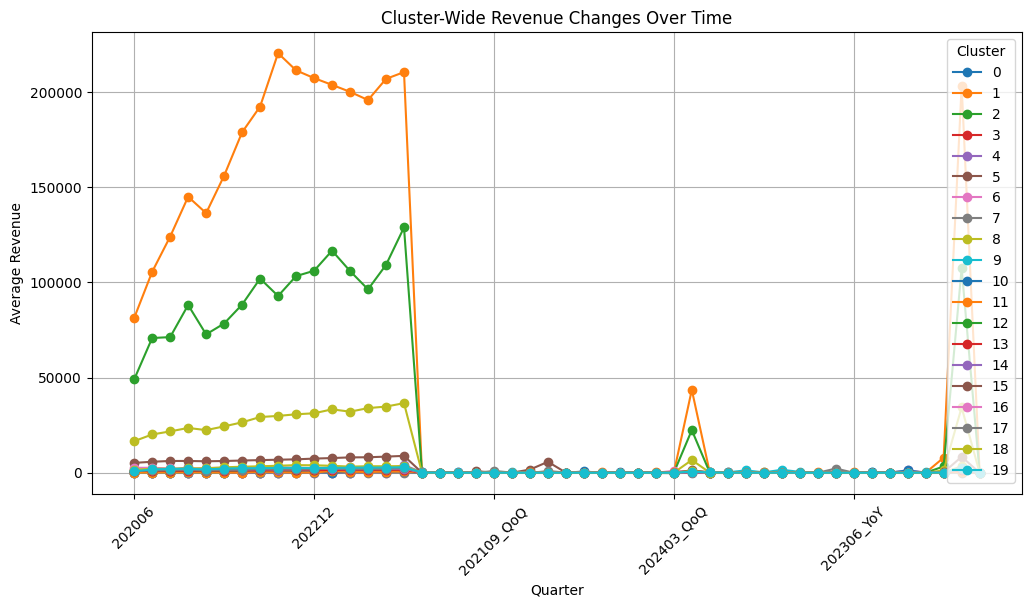

In [ ]:
# Select only numeric columns for aggregation
df_numeric = df_features.select_dtypes(include=['float64'])

# Group by 'Cluster' and calculate the mean revenue over time
cluster_revenue = df_numeric.groupby(df_features['Cluster']).agg('mean')

# Plot sector-wide (cluster) revenue changes over time
cluster_revenue.T.plot(figsize=(12, 6), marker='o')
plt.title('Cluster-Wide Revenue Changes Over Time')
plt.xlabel('Quarter')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


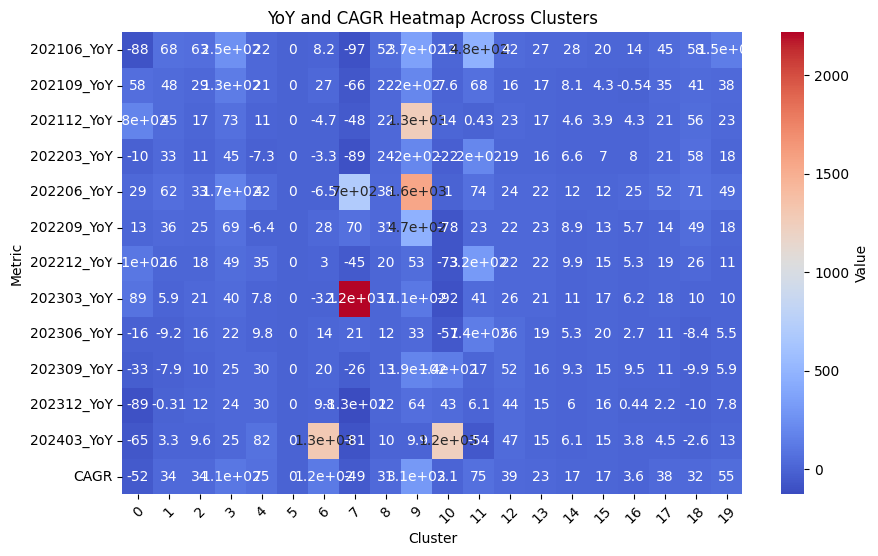

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the 'YoY' and 'CAGR' columns (you may need to adjust column names if necessary)
yoy_columns = [col for col in df_features.columns if 'YoY' in col]
cagr_column = ['CAGR']

# Create a new dataframe for YoY and CAGR values
df_yoy_cagr = df_features[yoy_columns + cagr_column]

# Group by 'Cluster' and calculate mean YoY and CAGR per cluster
cluster_yoy_cagr = df_yoy_cagr.groupby(df_features['Cluster']).agg('mean')

# Handle any NaN values by filling with 0 or another strategy
cluster_yoy_cagr = cluster_yoy_cagr.fillna(0)

# Create a heatmap for YoY and CAGR trends across clusters
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_yoy_cagr.T, annot=True, cmap='coolwarm', cbar_kws={'label': 'Value'},
            xticklabels=cluster_yoy_cagr.index, yticklabels=cluster_yoy_cagr.columns)
plt.title('YoY and CAGR Heatmap Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Metric')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company Name        500 non-null    object 
 1   202006              453 non-null    float64
 2   202009              459 non-null    float64
 3   202012              470 non-null    float64
 4   202103              476 non-null    float64
 5   202106              477 non-null    float64
 6   202109              482 non-null    float64
 7   202112              485 non-null    float64
 8   202203              486 non-null    float64
 9   202206              491 non-null    float64
 10  202209              496 non-null    float64
 11  202212              498 non-null    float64
 12  202303              499 non-null    float64
 13  202306              491 non-null    float64
 14  202309              497 non-null    float64
 15  202312              500 non-null    float64
 16  202403  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

# Select features for prediction (e.g., QoQ, YoY, CAGR, etc.)
features = ['202009_QoQ', '202012_QoQ', '202103_QoQ', '202106_QoQ', '202109_QoQ',
            '202112_QoQ', '202203_QoQ', '202206_QoQ', '202209_QoQ', '202212_QoQ',
            '202303_QoQ', '202306_QoQ', '202309_QoQ', '202312_QoQ', 'CAGR', 'Revenue_Slope',
            'Rolling_Avg_Growth', 'Max_Drawdown']

# Select target column (next quarter's revenue, e.g., '202403')
target = '202403'

# Filter out rows with missing values in the selected features and target column
df_clean = df_features[features + [target]].dropna()

# Define X (features) and y (target)
X = df_clean[features]
y = df_clean[target]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 596.8484066137094


In [ ]:
# Predict revenue for a few companies (e.g., first 5 rows of the test set)
forecast = model.predict(X_test.head(5))

# Show the predicted and actual values for comparison
for i in range(5):
    print(f"Predicted: {forecast[i]:.2f}, Actual: {y_test.iloc[i]:.2f}")


Predicted: 1703.98, Actual: 1771.46
Predicted: 29152.25, Actual: 29286.12
Predicted: 4540.88, Actual: 4347.72
Predicted: 59203.05, Actual: 67078.68
Predicted: 4953.21, Actual: 4909.75


Top 10 Companies with Highest YoY Growth Rate:
                                  Company Name   202403_YoY    202403  \
54            Bajaj Holdings & Investment Ltd.  1297.900565  1211.840   
415  Sterling and Wilson Renewable Energy Ltd.  1232.138415  1178.010   
444                        Tejas Networks Ltd.   343.298142  1326.880   
238                             Inox Wind Ltd.   176.660550   527.730   
84                                    BSE Ltd.   115.131492   488.370   
114                       Cochin Shipyard Ltd.   114.310068  1286.049   
317      Motilal Oswal Financial Services Ltd.   108.424424  2141.290   
82                    Brigade Enterprises Ltd.   102.044934  1702.370   
169                          Gland Pharma Ltd.    95.850759  1537.450   
97    Central Depository Services (India) Ltd.    92.988418   240.782   

     Predicted_202403  
54        1182.046299  
415        290.850786  
444       2590.973621  
238       1104.945928  
84         778.478201  
114  

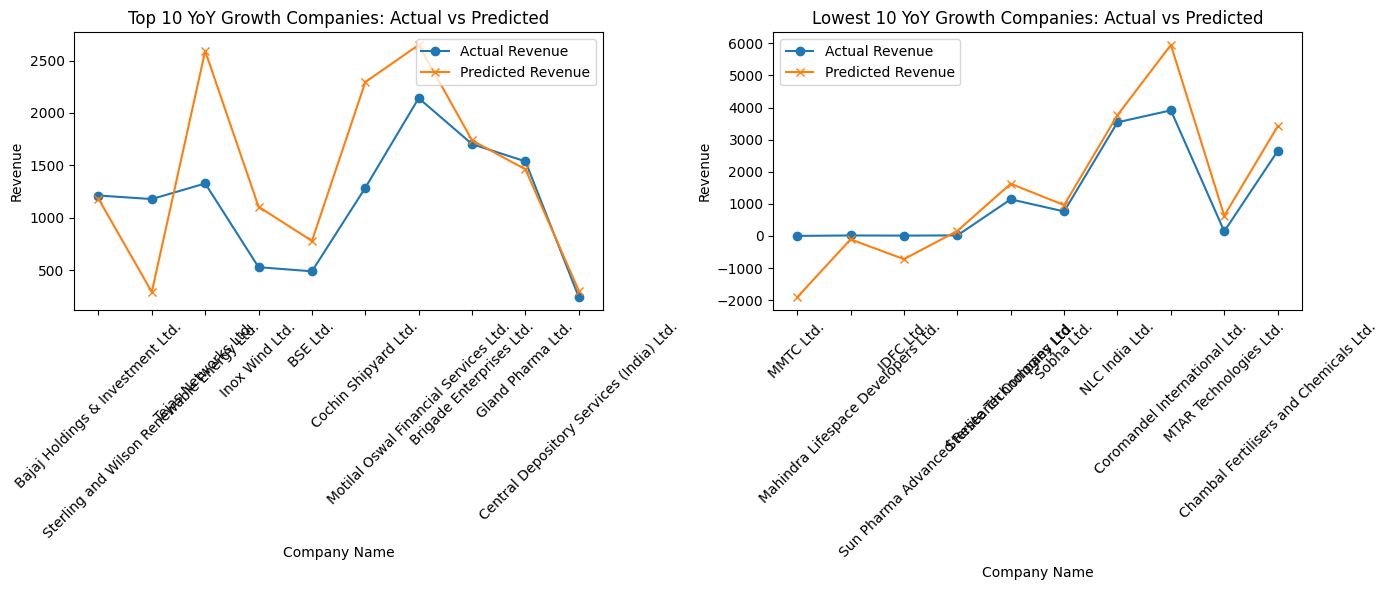

In [ ]:

import matplotlib.pyplot as plt

# 1. Generate predictions for all companies using the same features.
#    (Filling any missing values using the training set mean.)
X_all = df_features[features].fillna(X_train.mean())
all_predictions = model.predict(X_all)

# 2. Add the predictions to the original DataFrame as a new column.
df_features['Predicted_202403'] = all_predictions

# 3. Ensure the YoY column is numeric (in case it's not) so that sorting works.
#    (Replace '202403_YoY' with the correct YoY column if needed.)
df_features['202403_YoY'] = pd.to_numeric(df_features['202403_YoY'], errors='coerce')

# 4. Identify the top 10 companies with the highest YoY growth rate.
top10 = df_features.sort_values(by='202403_YoY', ascending=False).head(10)

# 5. Identify the lowest 10 companies with the lowest (most negative) YoY growth rate.
lowest10 = df_features.sort_values(by='202403_YoY', ascending=True).head(10)

# Print out the company names along with YoY growth, actual, and predicted revenues.
print("Top 10 Companies with Highest YoY Growth Rate:")
print(top10[['Company Name', '202403_YoY', target, 'Predicted_202403']])
print("\nLowest 10 Companies with Lowest YoY Growth Rate:")
print(lowest10[['Company Name', '202403_YoY', target, 'Predicted_202403']])

# 6. Plot Actual (forecast) vs Predicted revenue for top 10 and lowest 10 companies.
plt.figure(figsize=(14, 6))

# Top 10 Companies Plot
plt.subplot(1, 2, 1)
plt.plot(top10['Company Name'], top10[target], marker='o', label='Actual Revenue')
plt.plot(top10['Company Name'], top10['Predicted_202403'], marker='x', label='Predicted Revenue')
plt.title("Top 10 YoY Growth Companies: Actual vs Predicted")
plt.xlabel("Company Name")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.legend()

# Lowest 10 Companies Plot
plt.subplot(1, 2, 2)
plt.plot(lowest10['Company Name'], lowest10[target], marker='o', label='Actual Revenue')
plt.plot(lowest10['Company Name'], lowest10['Predicted_202403'], marker='x', label='Predicted Revenue')
plt.title("Lowest 10 YoY Growth Companies: Actual vs Predicted")
plt.xlabel("Company Name")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
# ---------------- Additional Code End Here ----------------


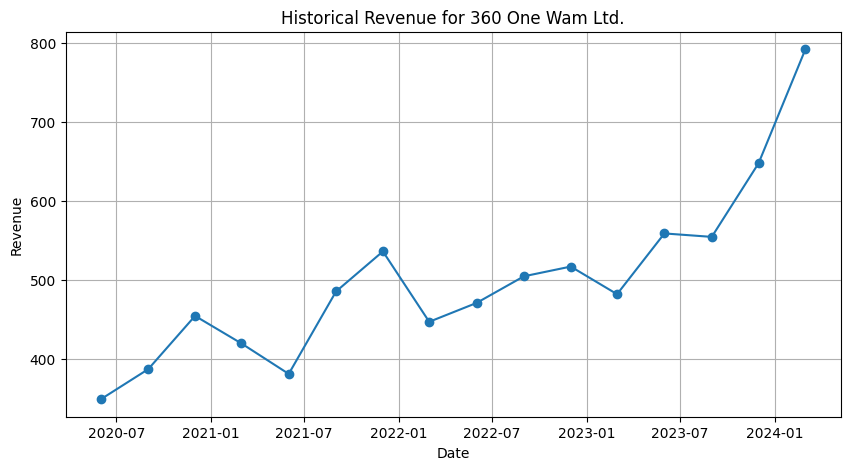

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -83.935
Date:                Tue, 11 Feb 2025   AIC                            173.870
Time:                        15:43:20   BIC                            175.994
Sample:                    06-01-2020   HQIC                           173.847
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4208      1.491     -0.282      0.778      -3.342       2.501
ma.L1          0.6672      1.091      0.612      0.541      -1.471       2.805
sigma2      4209.4650   2115.836      1.990      0.0

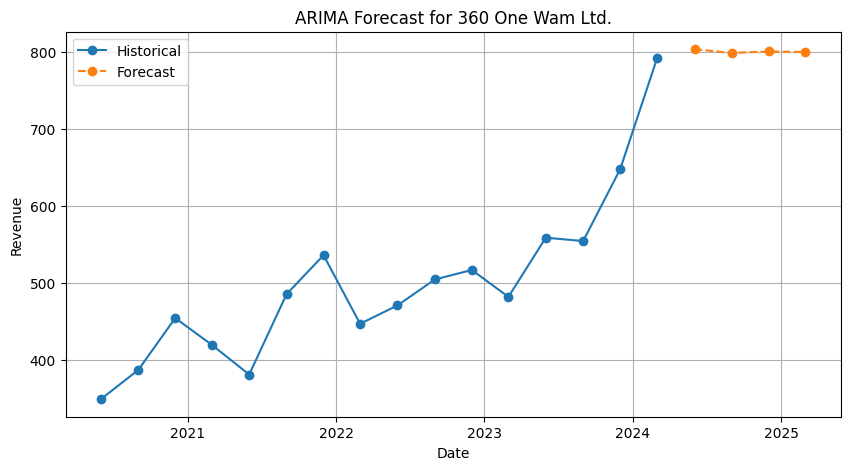

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# 1. Define the revenue columns (adjust the list if needed)
revenue_columns = [
    '202006', '202009', '202012', '202103', '202106', '202109',
    '202112', '202203', '202206', '202209', '202212', '202303',
    '202306', '202309', '202312', '202403'
]

# 2. Select a single company. Here we pick the first row.
company_row = df_features.iloc[0]
company_name = company_row['Company Name']
# Extract the revenue time series (dropping missing values and ensuring float type)
revenue_ts = company_row[revenue_columns].dropna().astype(float)

# 3. Convert the revenue column names (strings like '202006') to a datetime index.
#    Assuming the format is YYYYMM (e.g., '202006' means June 2020):
dates = pd.to_datetime(revenue_ts.index, format='%Y%m')
revenue_ts.index = dates

# 4. Plot the historical revenue series
plt.figure(figsize=(10, 5))
plt.plot(revenue_ts, marker='o')
plt.title(f"Historical Revenue for {company_name}")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

# (Optional) Check for stationarity here.
# For example, you might use the Augmented Dickey-Fuller test from statsmodels:
# from statsmodels.tsa.stattools import adfuller
# result = adfuller(revenue_ts)
# print(f"ADF Statistic: {result[0]}")
# print(f"p-value: {result[1]}")
# If the series is non-stationary, differencing (d > 0) may be required.

# 5. Fit an ARIMA model.
# Here we use ARIMA(1,1,1) for demonstration.
# (You may need to adjust the order based on the series' properties.)
model = ARIMA(revenue_ts, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# 6. Forecast future revenue.
forecast_steps = 4  # Number of periods to forecast
forecast = model_fit.forecast(steps=forecast_steps)
print("Forecasted Revenue:")
print(forecast)

# 7. Plot the forecast alongside the historical data.
plt.figure(figsize=(10, 5))
plt.plot(revenue_ts, label='Historical', marker='o')
plt.plot(forecast.index, forecast, label='Forecast', marker='o', linestyle='--')
plt.title(f"ARIMA Forecast for {company_name}")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.show()


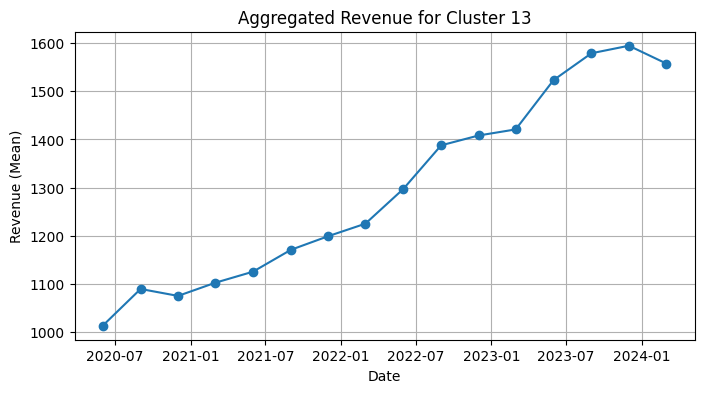

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Cluster 13 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -77.122
Date:                Tue, 11 Feb 2025   AIC                            160.243
Time:                        15:45:45   BIC                            162.368
Sample:                    06-01-2020   HQIC                           160.221
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    484.537      0.000       0.996       1.004
ma.L1         -0.9962      0.454     -2.192      0.028      -1.887      -0.106
sigma2      1449.310

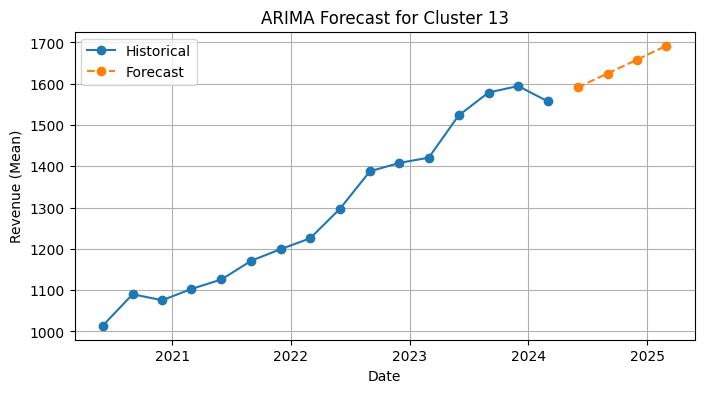

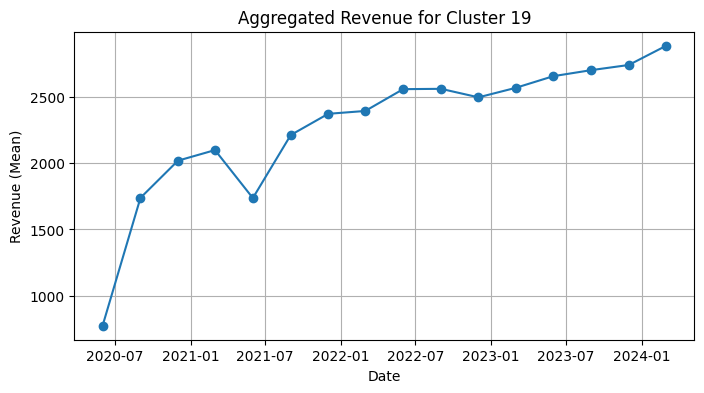

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Cluster 19 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -106.862
Date:                Tue, 11 Feb 2025   AIC                            219.723
Time:                        15:45:46   BIC                            221.847
Sample:                    06-01-2020   HQIC                           219.701
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.017     57.367      0.000       0.966       1.034
ma.L1         -0.9894      0.307     -3.220      0.001      -1.592      -0.387
sigma2      8.413e+0

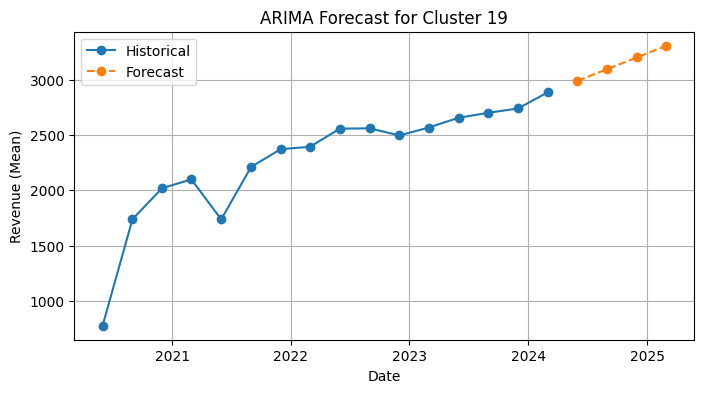

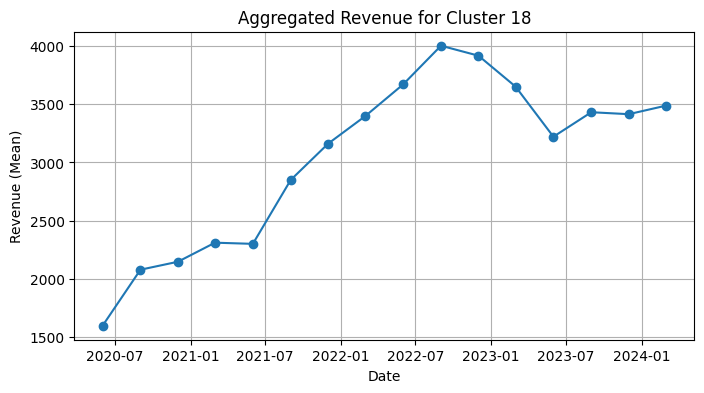

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Cluster 18 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -104.328
Date:                Tue, 11 Feb 2025   AIC                            214.657
Time:                        15:45:47   BIC                            216.781
Sample:                    06-01-2020   HQIC                           214.634
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6827      0.475      1.438      0.151      -0.248       1.613
ma.L1         -0.2903      0.593     -0.490      0.624      -1.452       0.872
sigma2      6.533e+0

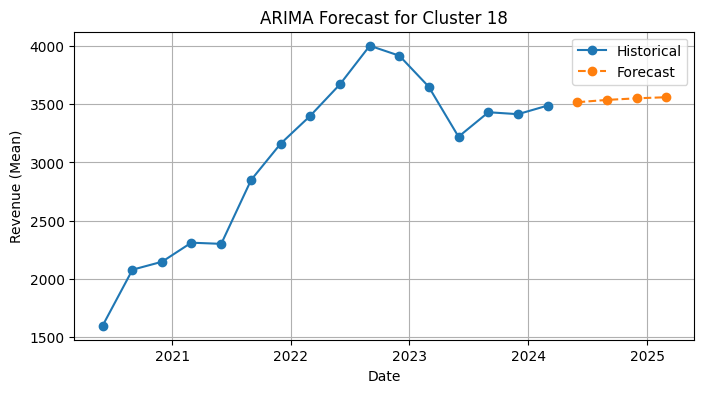

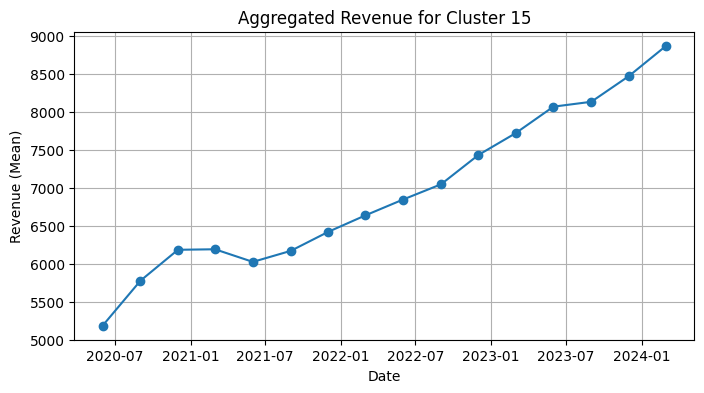

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Cluster 15 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -99.232
Date:                Tue, 11 Feb 2025   AIC                            204.464
Time:                        15:45:47   BIC                            206.588
Sample:                    06-01-2020   HQIC                           204.441
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7508      0.205      3.668      0.000       0.350       1.152
ma.L1          0.1587      0.344      0.462      0.644      -0.515       0.832
sigma2      3.401e+0

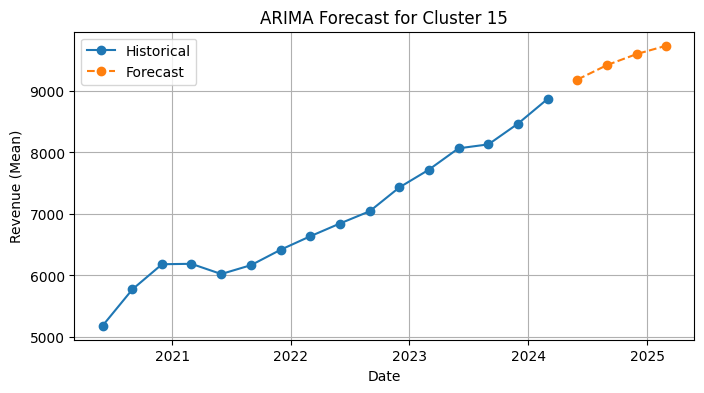

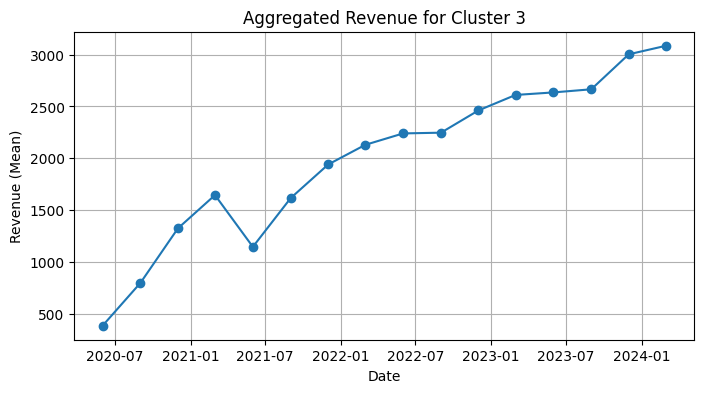

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Cluster 3 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -106.591
Date:                Tue, 11 Feb 2025   AIC                            219.181
Time:                        15:45:48   BIC                            221.305
Sample:                    06-01-2020   HQIC                           219.159
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7951      0.590     -1.348      0.178      -1.951       0.361
ma.L1          0.9995     84.787      0.012      0.991    -165.180     167.179
sigma2      8.188e+04

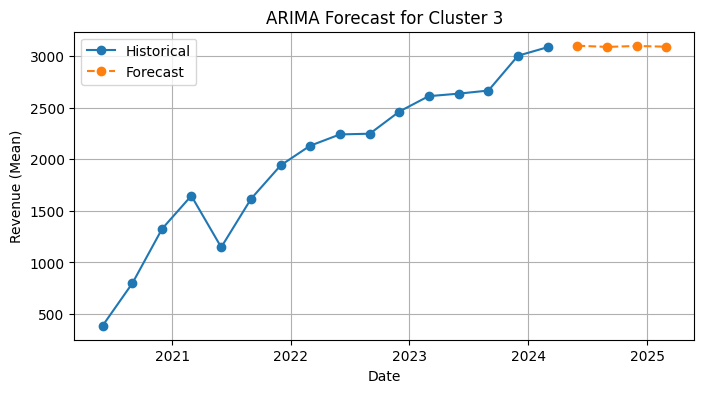

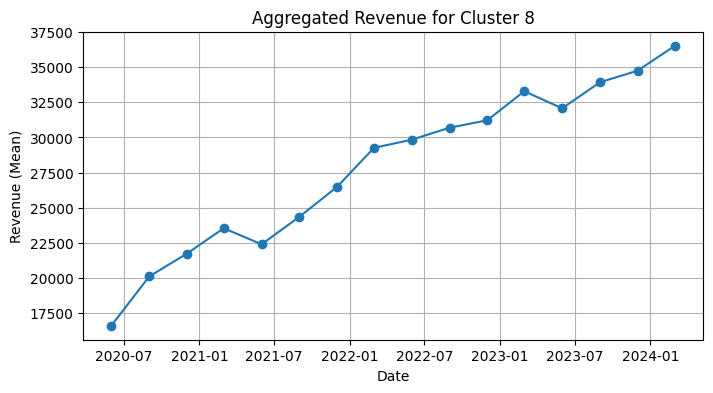

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Cluster 8 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -128.472
Date:                Tue, 11 Feb 2025   AIC                            262.943
Time:                        15:45:49   BIC                            265.068
Sample:                    06-01-2020   HQIC                           262.921
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9482      0.070     13.468      0.000       0.810       1.086
ma.L1         -0.8512      0.132     -6.464      0.000      -1.109      -0.593
sigma2       1.63e+06

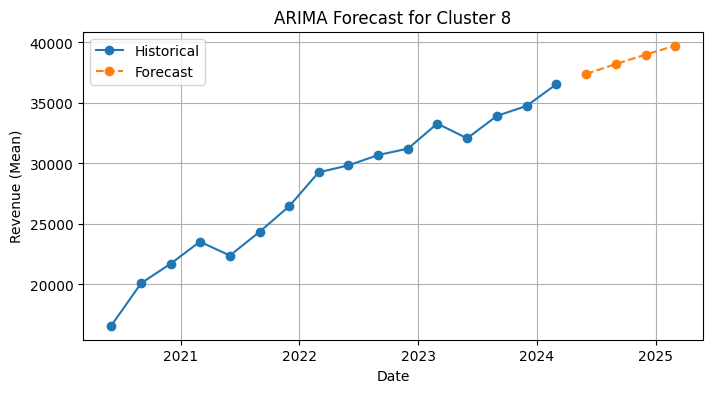

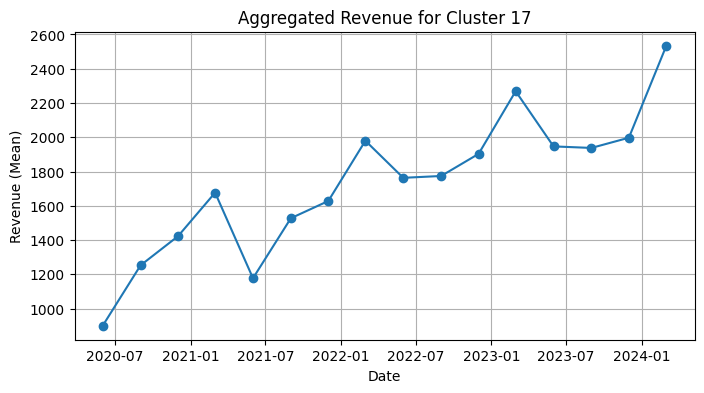

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Cluster 17 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -106.417
Date:                Tue, 11 Feb 2025   AIC                            218.834
Time:                        15:45:49   BIC                            220.958
Sample:                    06-01-2020   HQIC                           218.811
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.018     55.493      0.000       0.965       1.035
ma.L1         -0.9968      0.515     -1.934      0.053      -2.007       0.013
sigma2      8.106e+0

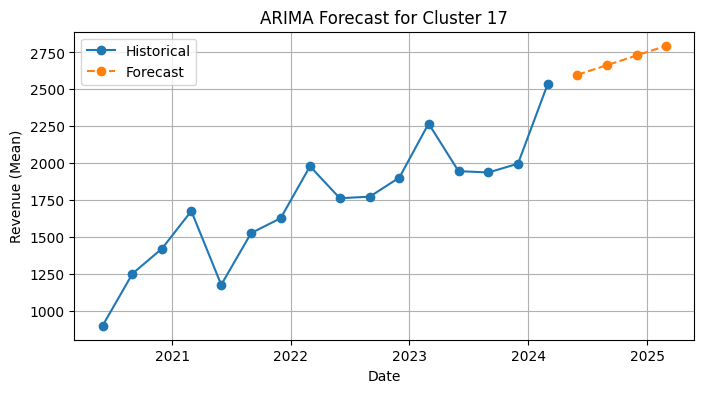

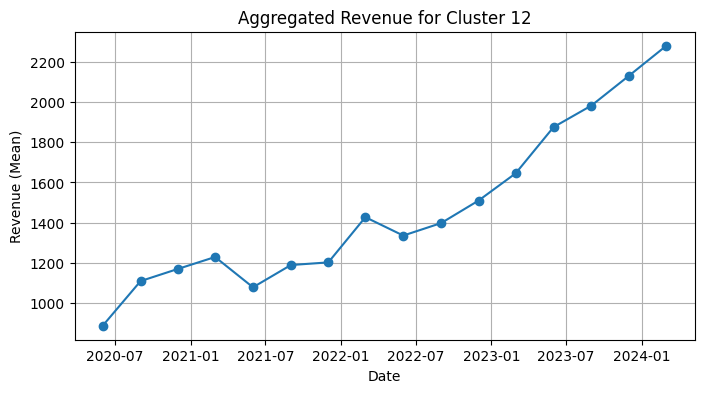

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Cluster 12 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -92.704
Date:                Tue, 11 Feb 2025   AIC                            191.407
Time:                        15:45:50   BIC                            193.532
Sample:                    06-01-2020   HQIC                           191.385
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9974      0.120      8.319      0.000       0.762       1.232
ma.L1         -0.9406      1.343     -0.701      0.484      -3.572       1.691
sigma2      1.231e+0

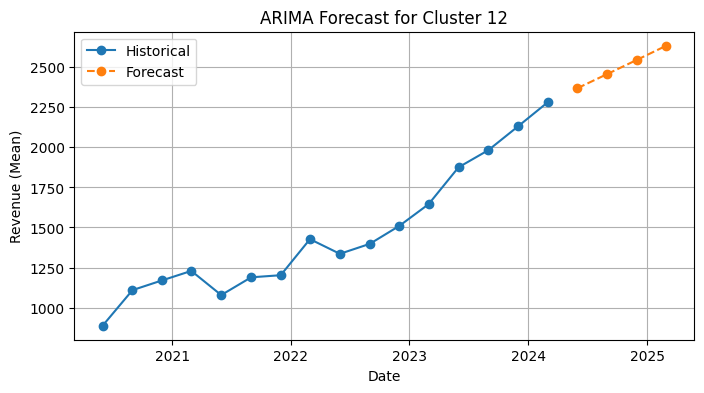

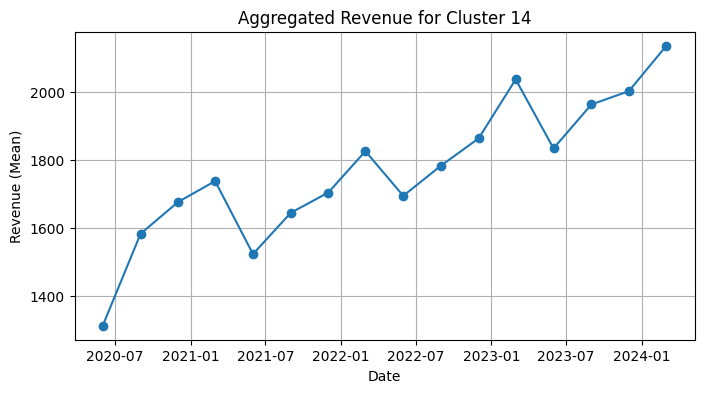

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Cluster 14 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -93.405
Date:                Tue, 11 Feb 2025   AIC                            192.810
Time:                        15:45:51   BIC                            194.934
Sample:                    06-01-2020   HQIC                           192.787
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.003   -339.929      0.000      -1.006      -0.994
ma.L1          0.9968      0.522      1.909      0.056      -0.026       2.020
sigma2      1.274e+0

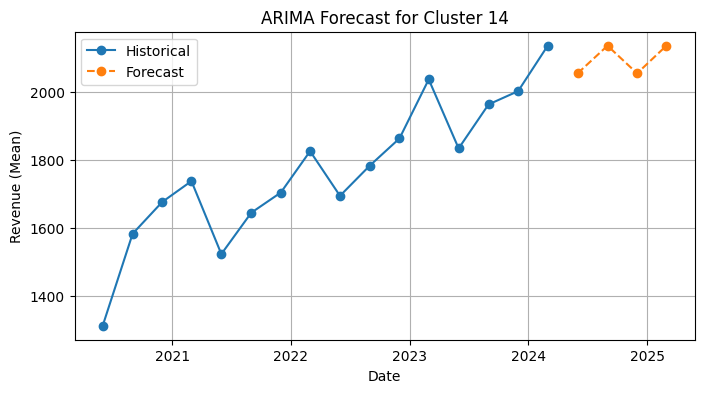

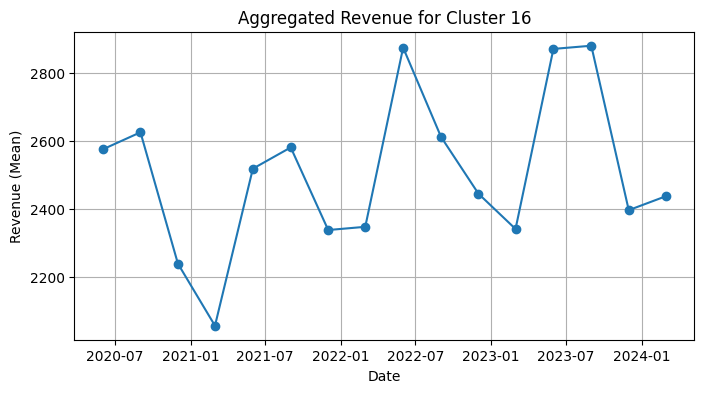

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Cluster 16 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -104.015
Date:                Tue, 11 Feb 2025   AIC                            214.029
Time:                        15:45:51   BIC                            216.153
Sample:                    06-01-2020   HQIC                           214.006
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2267      0.434      0.522      0.602      -0.625       1.078
ma.L1         -0.9982     21.465     -0.047      0.963     -43.070      41.073
sigma2      5.275e+0

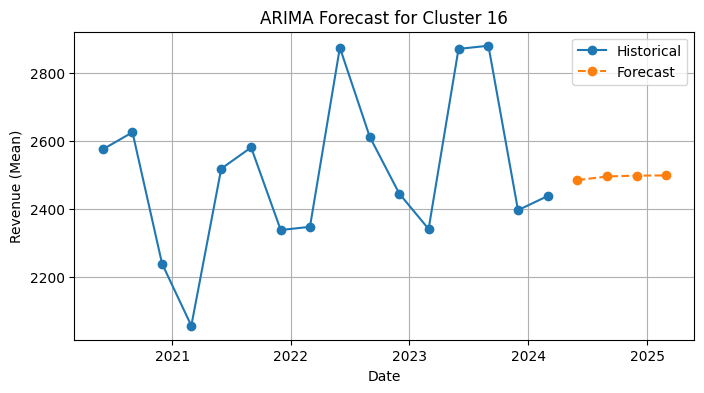

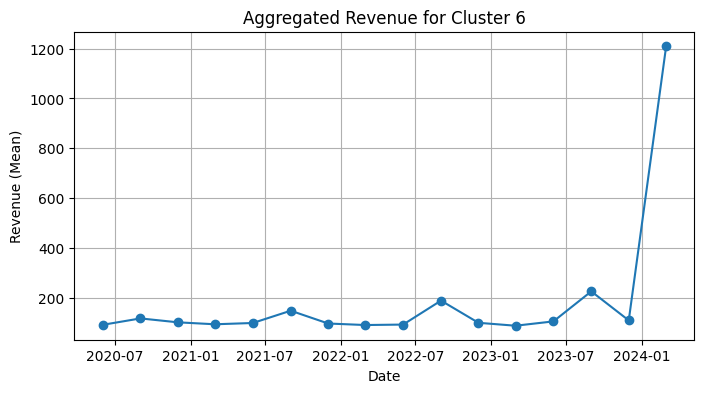

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Cluster 6 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -105.483
Date:                Tue, 11 Feb 2025   AIC                            216.966
Time:                        15:45:52   BIC                            219.090
Sample:                    06-01-2020   HQIC                           216.944
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7871      6.775     -0.116      0.908     -14.066      12.492
ma.L1          0.0834     16.392      0.005      0.996     -32.044      32.211
sigma2      7.176e+04

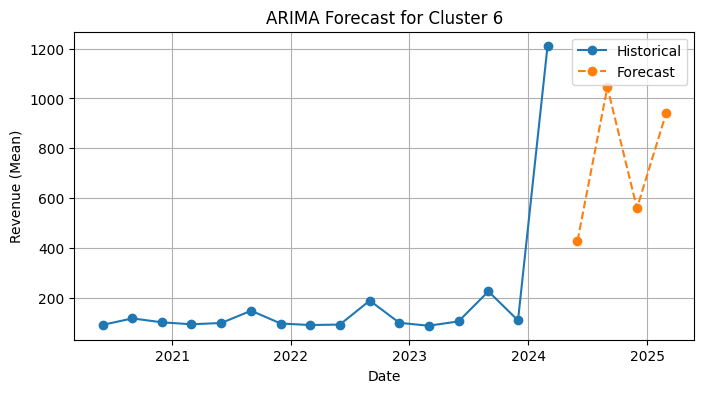

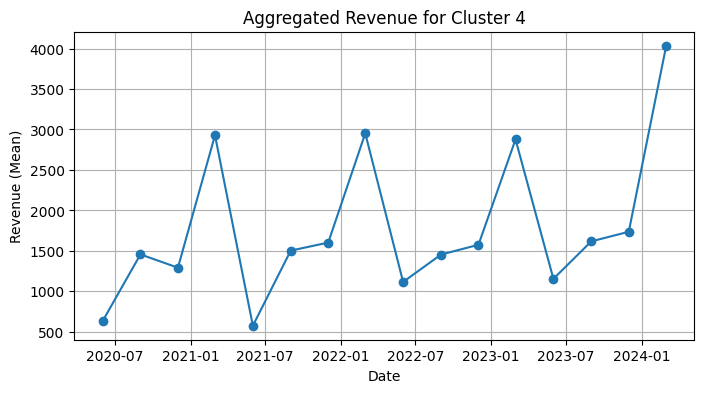

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Cluster 4 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -125.310
Date:                Tue, 11 Feb 2025   AIC                            256.619
Time:                        15:45:53   BIC                            258.743
Sample:                    06-01-2020   HQIC                           256.597
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2620      1.056     -0.248      0.804      -2.332       1.808
ma.L1         -0.7541      1.111     -0.679      0.497      -2.932       1.423
sigma2      9.662e+05

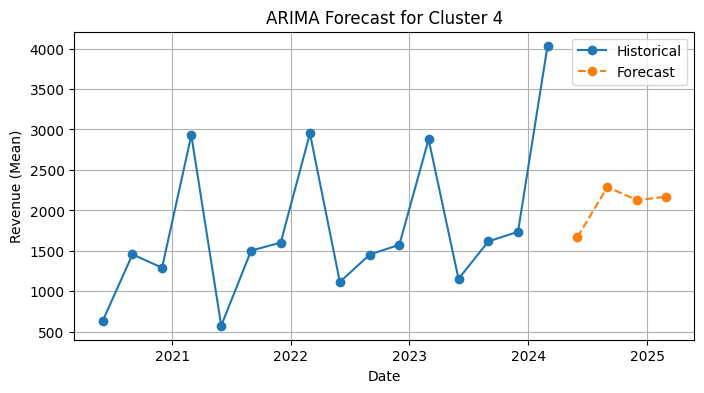

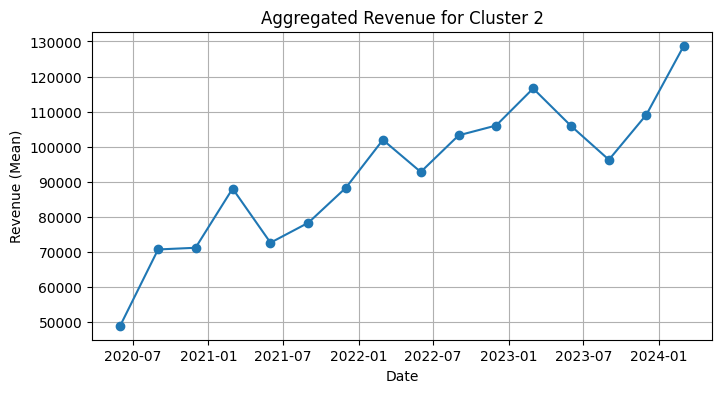

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

Cluster 2 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -162.441
Date:                Tue, 11 Feb 2025   AIC                            330.881
Time:                        15:45:53   BIC                            333.006
Sample:                    06-01-2020   HQIC                           330.859
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4099      0.703      0.583      0.560      -0.968       1.787
ma.L1         -0.2182      0.754     -0.289      0.772      -1.696       1.260
sigma2      1.235e+08

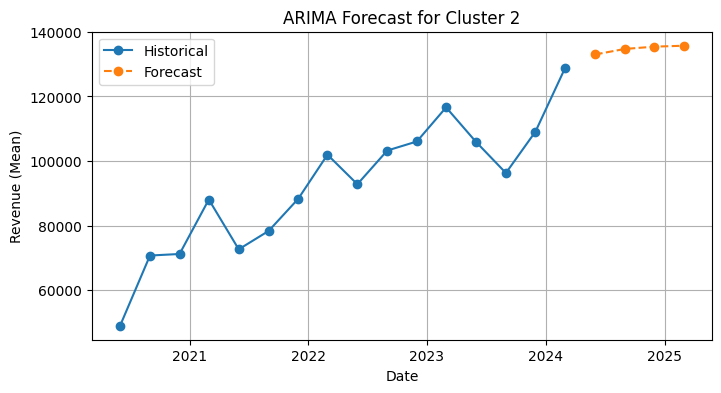

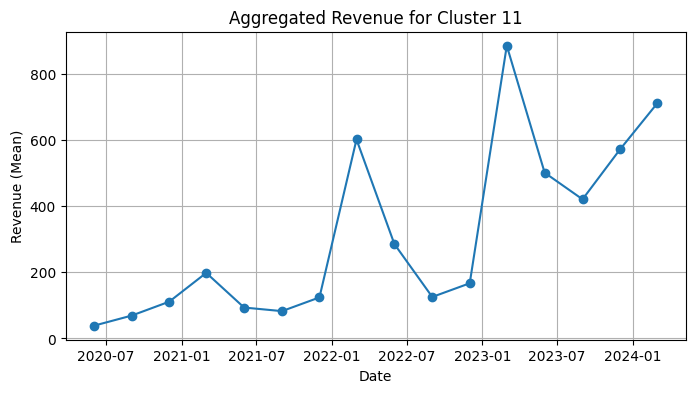

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Cluster 11 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -103.280
Date:                Tue, 11 Feb 2025   AIC                            212.560
Time:                        15:45:54   BIC                            214.684
Sample:                    06-01-2020   HQIC                           212.538
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0643      1.447      0.044      0.965      -2.772       2.901
ma.L1         -0.6225      0.841     -0.741      0.459      -2.270       1.025
sigma2      5.456e+0

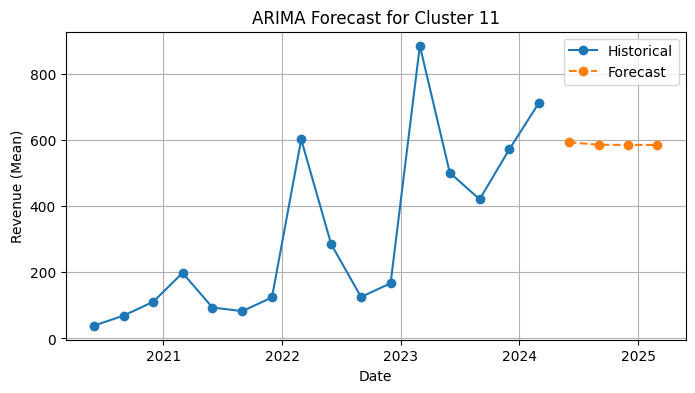

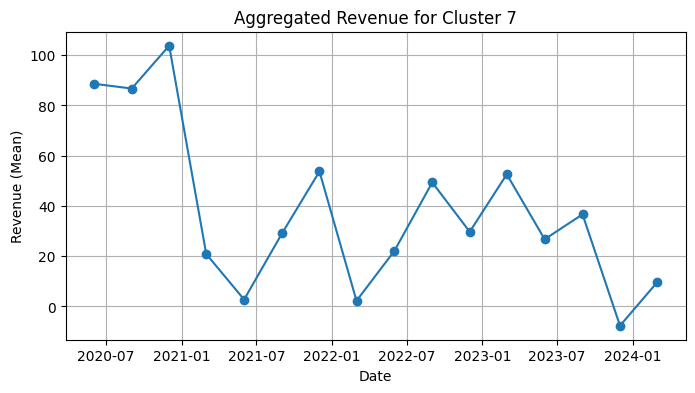

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Cluster 7 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -72.695
Date:                Tue, 11 Feb 2025   AIC                            151.389
Time:                        15:45:55   BIC                            153.514
Sample:                    06-01-2020   HQIC                           151.367
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3263      0.475      0.687      0.492      -0.604       1.257
ma.L1         -0.7218      0.505     -1.428      0.153      -1.712       0.269
sigma2       929.0365

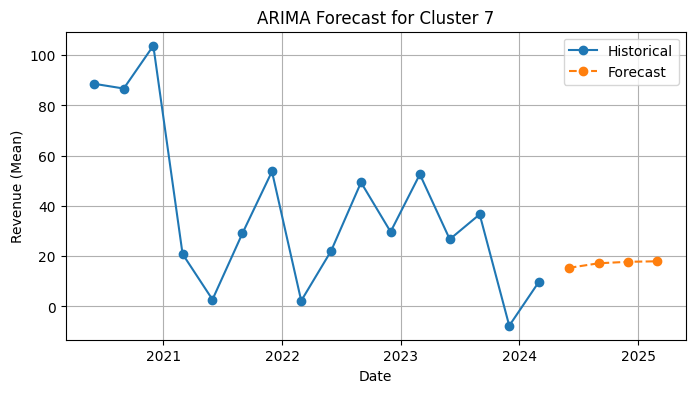

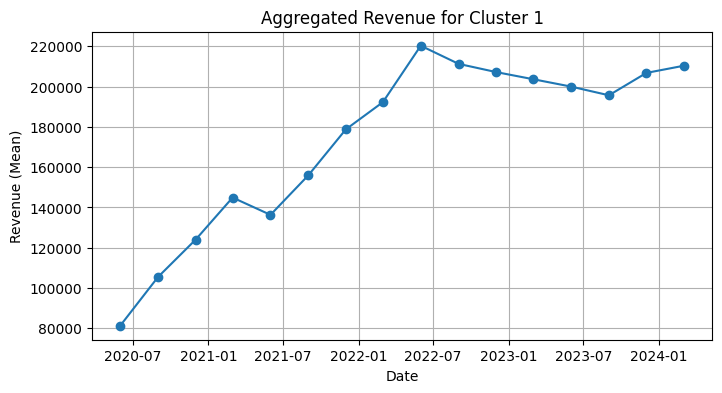

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Cluster 1 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -161.722
Date:                Tue, 11 Feb 2025   AIC                            329.443
Time:                        15:45:55   BIC                            331.568
Sample:                    06-01-2020   HQIC                           329.421
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8449      0.179      4.722      0.000       0.494       1.196
ma.L1         -0.6634      0.374     -1.771      0.076      -1.397       0.071
sigma2      1.549e+08

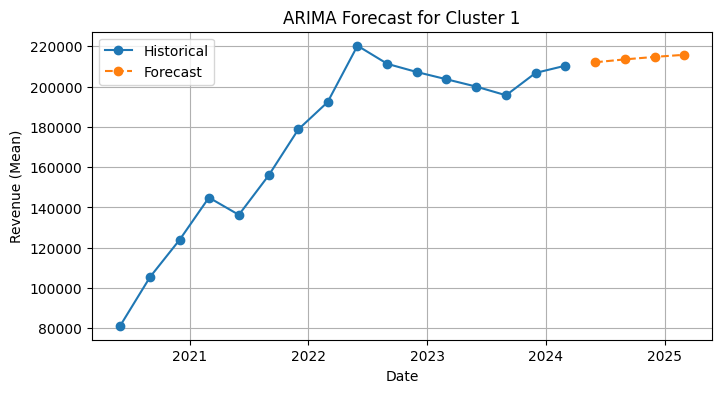

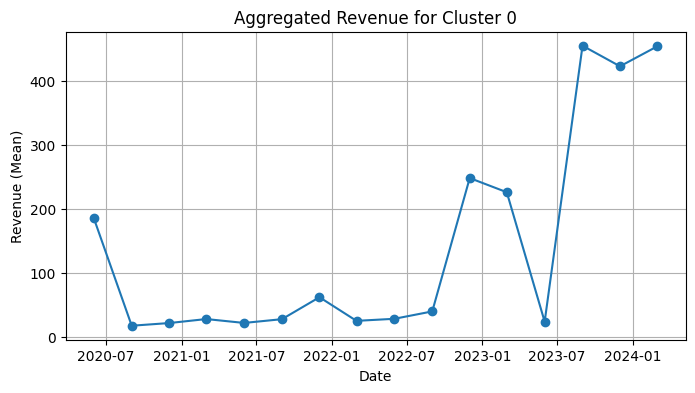

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Cluster 0 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -94.456
Date:                Tue, 11 Feb 2025   AIC                            194.912
Time:                        15:45:56   BIC                            197.036
Sample:                    06-01-2020   HQIC                           194.890
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1138      0.708     -0.161      0.872      -1.502       1.274
ma.L1         -0.3111      0.796     -0.391      0.696      -1.871       1.249
sigma2      1.708e+04

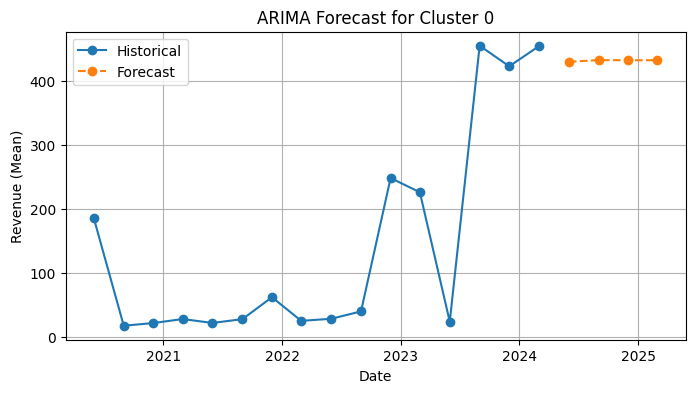

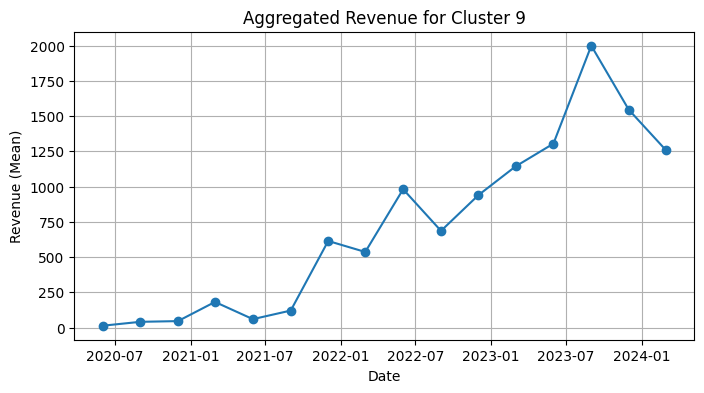

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Cluster 9 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -107.275
Date:                Tue, 11 Feb 2025   AIC                            220.550
Time:                        15:45:56   BIC                            222.674
Sample:                    06-01-2020   HQIC                           220.527
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3127      1.596     -0.196      0.845      -3.440       2.815
ma.L1          0.1424      1.745      0.082      0.935      -3.278       3.562
sigma2      9.519e+04

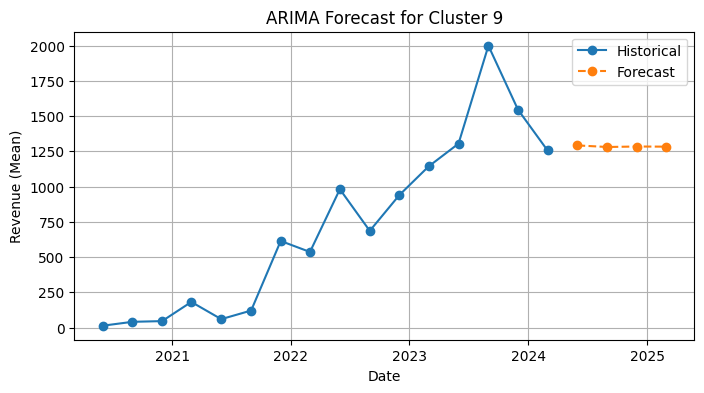

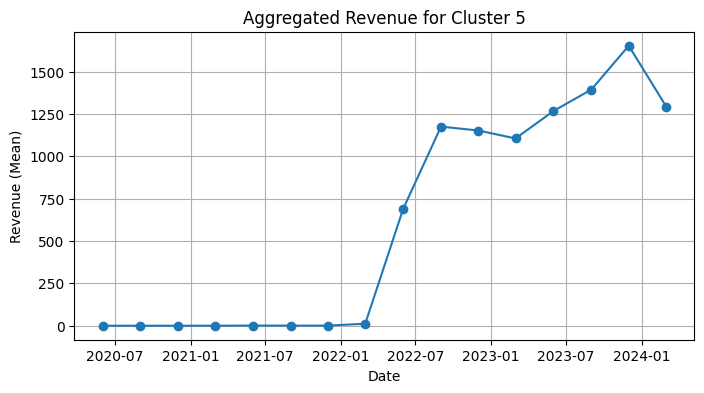

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Cluster 5 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -103.003
Date:                Tue, 11 Feb 2025   AIC                            212.006
Time:                        15:45:57   BIC                            214.130
Sample:                    06-01-2020   HQIC                           211.983
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0271      1.568     -0.017      0.986      -3.101       3.047
ma.L1          0.4825      1.551      0.311      0.756      -2.557       3.522
sigma2      5.317e+04

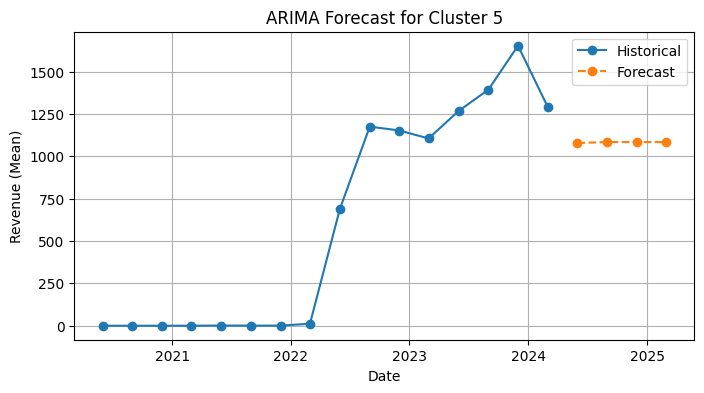

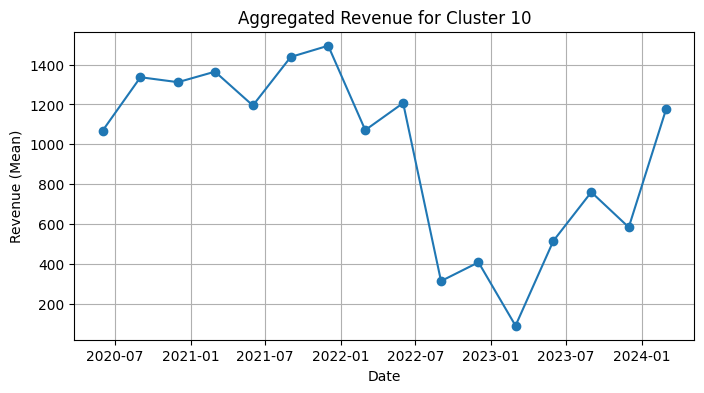

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Cluster 10 ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -108.486
Date:                Tue, 11 Feb 2025   AIC                            222.973
Time:                        15:45:58   BIC                            225.097
Sample:                    06-01-2020   HQIC                           222.950
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6071      0.743     -0.817      0.414      -2.064       0.850
ma.L1          0.2927      1.004      0.292      0.771      -1.675       2.260
sigma2      1.097e+0

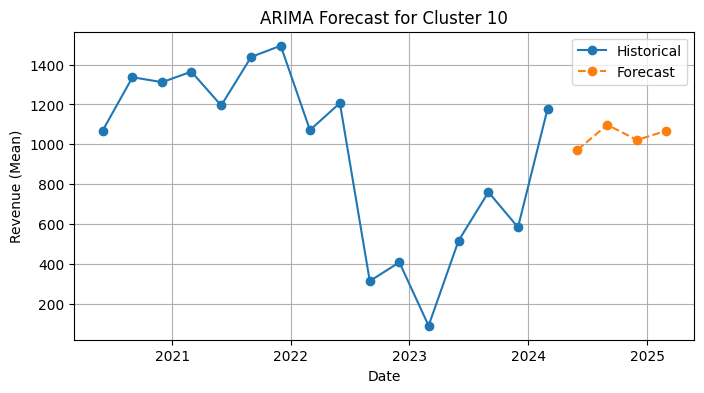

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define your revenue columns (adjust as needed)
revenue_columns = [
    '202006', '202009', '202012', '202103', '202106', '202109',
    '202112', '202203', '202206', '202209', '202212', '202303',
    '202306', '202309', '202312', '202403'
]

# Ensure that revenue columns are numeric (if not already)
df_features[revenue_columns] = df_features[revenue_columns].apply(pd.to_numeric, errors='coerce')

# Get the unique clusters
clusters = df_features['Cluster'].unique()

# Dictionary to store forecasts for each cluster
cluster_forecasts = {}

for cl in clusters:
    # Filter data for companies in the current cluster
    cluster_df = df_features[df_features['Cluster'] == cl]

    # Aggregate the revenue time series by taking the mean (or sum) for each time period
    aggregated_series = cluster_df[revenue_columns].mean(axis=0)

    # Convert the index (which are strings like '202006') into datetime objects.
    aggregated_series.index = pd.to_datetime(aggregated_series.index, format='%Y%m')



    # Plot the aggregated series for inspection
    plt.figure(figsize=(8, 4))
    plt.plot(aggregated_series, marker='o')
    plt.title(f"Aggregated Revenue for Cluster {cl}")
    plt.xlabel("Date")
    plt.ylabel("Revenue (Mean)")
    plt.grid(True)
    plt.show()

    # Fit an ARIMA model; adjust the order (p,d,q) based on diagnostics (e.g., ACF/PACF or ADF test)
    try:
        model = ARIMA(aggregated_series, order=(1, 1, 1))
        model_fit = model.fit()
        print(f"Cluster {cl} ARIMA Model Summary:")
        print(model_fit.summary())

        # Forecast future revenue—e.g., forecast the next 4 periods
        forecast_steps = 4
        forecast = model_fit.forecast(steps=forecast_steps)
        cluster_forecasts[cl] = forecast

        # Plot forecast against historical data
        plt.figure(figsize=(8, 4))
        plt.plot(aggregated_series, label='Historical', marker='o')
        plt.plot(forecast.index, forecast, label='Forecast', marker='o', linestyle='--')
        plt.title(f"ARIMA Forecast for Cluster {cl}")
        plt.xlabel("Date")
        plt.ylabel("Revenue (Mean)")
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"An error occurred for Cluster {cl}: {e}")

# Now, cluster_forecasts holds the forecasted values for each cluster.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Select only relevant features for LSTM model (revenue and growth metrics)
features_lstm = ['202009', '202012', '202103', '202106', '202109', '202112',
                 '202203', '202206', '202209', '202212', '202303', '202306', '202309', '202312']
target_lstm = '202403'

# Prepare the data (scale the features)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_features[features_lstm])

# Reshape data for LSTM input
X = []
y = []
for i in range(len(scaled_data) - 1):
    X.append(scaled_data[i:i+1])  # Use previous quarter data to predict the next
    y.append(df_features[target_lstm].iloc[i+1])  # Target is next quarter's revenue

X = np.array(X)
y = np.array(y)

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(units=1))

# Compile and train the LSTM model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict the next quarter's revenue using the LSTM model
y_pred_lstm = model_lstm.predict(X_test)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: nan - val_loss: nan
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


### Executive Summary: Itus Capital Revenue Analysis & Forecasting

**Data Analysis:**
- **Revenue Growth Trends:**
  - **YoY Growth Calculation**: Calculated YoY growth rates for all companies from 2020 to present.
  - **Top 10 Companies with Highest YoY Growth**: Identified companies with the highest YoY growth in the latest quarter, with examples like Bajaj Holdings & Investment Ltd. (1297.9%) and Sterling and Wilson Renewable Energy Ltd. (1232.1%).
  - **Bottom 10 Companies with Lowest YoY Growth**: Identified companies experiencing consistent revenue decline, such as MMTC Ltd. (-99.9%) and Mahindra Lifespace Developers Ltd. (-94.4%).
  - **Consistent Decline**: Companies with 4+ consecutive quarters of revenue decline were flagged for further analysis.

- **CAGR Calculation**:
  - Compound Annual Growth Rate (CAGR) for each company calculated to measure long-term growth trends.

- **Cluster Analysis**:
  - **Revenue Growth Pattern Clustering**: Applied k-means clustering to group companies based on similar revenue growth patterns and applied further subclustering.
  - **Feature Addition for Clustering**: Added relevant features like QoQ growth rate, Revenue Slope, Max Drawdown, and Rolling Average Growth for improved cluster separation.

**Predictive Modeling:**
- **Linear Regression for Revenue Forecasting**:
  - Trained a Linear Regression model to forecast the next quarter’s revenue (202403) for each company.
  - Evaluated model performance using Mean Absolute Error (MAE).
  - Forecast results for select companies compared against actual revenues.
  - Generated predictions for 500 companies and stored them for further analysis.
- **ARIMA Model**:
  - **ARIMA Forecasting**: Applied ARIMA model (ARIMA(1,1,1)) to predict revenue for individual companies and clusters.
  - **Company-Level Forecasting**: Used historical revenue series for individual companies to fit ARIMA models, forecasting future revenue for select companies.
  - **Cluster-Level Forecasting**: Aggregated revenue data by cluster and fitted ARIMA models for each cluster to forecast future performance.
  - **Plotting**: Displayed forecasted revenue alongside historical revenue to visualize trends and predictions.

- **LSTM Model**:
  - **Data Preparation for LSTM**: Scaled the revenue data using MinMaxScaler and reshaped it to fit LSTM model input.
  - **LSTM Training**: Defined and trained an LSTM model using past revenue data to predict next quarter's revenue.
  - **Model Evaluation**: Split data into training and testing sets, trained the model, and used it to predict future revenue.
  - **Prediction**: Forecasted the next quarter’s revenue based on historical growth metrics using LSTM for improved time-series predictions.

**Visualization:**
- **Predicted vs. Actual Revenue Comparison**: Plotted the predicted revenues vs actual revenues for top 10 performers and lowest 10 performers.
- **Seasonal and Sector-wide Trends**: Heatmaps and charts to analyze seasonal trends across different sectors.
- **Top and Bottom Performers**: Plots showing the comparison of predicted and actual revenue for companies with the highest and lowest YoY growth.

**Key Insights:**
- **High Growth Companies**: Some companies have shown exceptional growth (e.g., Bajaj Holdings & Investment Ltd.) indicating potential investment opportunities.
- **Underperforming Companies**: Companies with declining revenues, such as MMTC Ltd., require a strategic review for turnaround or divestment.
- **Predictive Accuracy**: The regression model’s predictions align reasonably well with actual revenues, providing a reliable forecasting tool for future decision-making.

**Next Steps:**
- **Model Improvement**: Explore more sophisticated models (e.g., Random Forest, XGBoost) for better accuracy, but since only simple models were asked, I've used the basic linear regression and then, one model from each category: statistical (ARIMA) and deep learning (LSTM).
- **Actionable Decisions**: Use the insights from top/bottom performers for portfolio rebalancing, strategic investments, or risk mitigation.
